#**Main Topic**
Amazon Sales Data Analysis for Marketing Insights

## Background Project
Sebagai salah satu platform e-commerce terbesar di dunia, Amazon menyediakan data penjualan yang kaya dan beragam, mencakup informasi produk, tren penjualan, perilaku belanja, serta distribusi geografis. Analisis terhadap data ini memungkinkan perusahaan untuk mengidentifikasi kategori produk terlaris, memahami pola pembelian pelanggan, dan menemukan wilayah dengan potensi tinggi. Dengan memanfaatkan wawasan tersebut, bisnis dapat merancang strategi pemasaran yang lebih terarah dan berbasis bukti.

## Problem Statement
Analisis tren penjualan bulanan menunjukkan bahwa penjualan mencapai puncaknya pada bulan April namun menurun secara signifikan pada bulan Mei dan Juni. Penurunan ini mungkin disebabkan oleh berbagai faktor, seperti perubahan permintaan konsumen, berkurangnya efektivitas promosi, perubahan perilaku belanja, atau perbedaan daya beli antar wilayah.

## Objective

Untuk menemukan akar penyebabnya, diperlukan analisis mendalam mengenai:

*   Kategori produk terlaris dan paling menguntungkan
*   Perubahan tren penjualan pada periode tertentu
*   Perilaku pembelian pelanggan dan preferensi pengiriman
*   Distribusi penjualan secara geografis dan popularitas produk berdasarkan wilayah

## Exploratory Data Analytics (EDA)

*   Analisis Produk
1. Evaluasi kategori produk paling laris dan paling menguntungkan.

*   Analisis Tren Penjualan
1. Apakah ada lonjakan atau penurunan penjualan yang signifikan di tanggal atau bulan tertentu?.
2. Produk apa yang paling laris di bulan tertentu.

*   Analisis Perilaku Belanja

1.  Customer behavior berdasarkan metode fulfillment dan ship-service level
2.  Metode pengiriman yang paling sering dipilih tiap kategori produk.

*   Analisis Geografis
1.   Kota atau negara bagian mana yang memiliki volume penjualan tertinggi?
2.   Apakah ada produk-produk tertentu yang lebih populer di suatu wilayah dibandingkan wilayah lain?

# **Import Library**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import math
from scipy import stats

pd.set_option("display.max_columns", None) # show all columns
pd.set_option("display.max_rows", None) # show all rows

## Access to Drive

In [ ]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#path dataset di drive
file_name = '/content/drive/MyDrive/DIBIMBING/Rahma Anggana Rarastyasa_Final Project Data Analytics/Amazon Sale Report.csv'

#read file csv
df_amazon = pd.read_csv(file_name)

#display dataset
df_amazon.head()

index             Order ID      Date                        Status  \
0      0  405-8078784-5731545  04-30-22                     Cancelled   
1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146  04-30-22                       Shipped   
3      3  403-9615377-8133951  04-30-22                     Cancelled   
4      4  407-1069790-7240320  04-30-22                       Shipped   

  Fulfilment Sales Channel ship-service-level  Category Size Courier Status  \
0   Merchant     Amazon.in           Standard   T-shirt    S     On the Way   
1   Merchant     Amazon.in           Standard     Shirt  3XL        Shipped   
2     Amazon     Amazon.in          Expedited     Shirt   XL        Shipped   
3   Merchant     Amazon.in           Standard   Blazzer    L     On the Way   
4     Amazon     Amazon.in          Expedited  Trousers  3XL        Shipped   

   Qty currency  Amount    ship-city   ship-state  ship-postal-code  \
0    0      INR  647.62       MUMBAI  MAHARASHTRA          400081.0   
1    1      INR  406.00    BENGALURU    KARNATAKA          560085.0   
2    1      INR  329.00  NAVI MUMBAI  MAHARASHTRA          410210.0   
3    0      INR  753.33   PUDUCHERRY   PUDUCHERRY          605008.0   
4    1      INR  574.00      CHENNAI   TAMIL NADU          600073.0   

  ship-country    B2B fulfilled-by  New  PendingS  
0           IN  False    Easy Ship  NaN       NaN  
1           IN  False    Easy Ship  NaN       NaN  
2           IN   True          NaN  NaN       NaN  
3           IN  False    Easy Ship  NaN       NaN  
4           IN  False          NaN  NaN       NaN

# **Data Understanding**

Dictionary dataset:
File `amazon sale report.csv` berisi berbagai kolom, masing-masing mewakili atribut yang berbeda dari data penjualan. Berikut adalah deskripsi singkat dari setiap kolom:

| Nama Kolom        | Deskripsi                                                                 |
|-------------------|---------------------------------------------------------------------------|
| Order ID          | A unique identifier for each order placed on Amazon                      |
| Date              | The date when the order was placed                                       |
| Status            | The current status of the order (e.g., Shipped, Delivered, Pending)      |
| Fulfilment        | Indicates the method used to fulfill the order (e.g., Fulfilled by Amazon, Fulfilled by Seller) |
| Sales Channel     | The channel through which the sale was made (e.g., Amazon Website, Mobile App) |
| ship-service-level| The shipping service level selected for the order (e.g., Standard, Expedited) |
| Category          | The product category to which the purchased item belongs (e.g., Electronics, Clothing, Home Goods) |
| Size              | The size of the product ordered (e.g., Small, Medium, Large)             |
| Courier Status    | The status of the shipment with the carrier (e.g., In Transit, Delivered, Returned) |
| Qty               | The quantity of items ordered in the transaction                         |
| Currency          | The currency in which the transaction amount is recorded (e.g., INR)     |
| Amount            | The total monetary value of the order                                    |
| ship-city         | The city where the order is to be shipped                                |
| ship-state        | The state or region where the order is to be shipped                     |
| ship-postal-code  | The postal code of the shipping address                                  |
| ship-country      | The country where the order is to be shipped                             |
| B2B               | Indicates whether the order is a business-to-business transaction (True/False) |
| fulfilled-by      | The logistics or shipping service handling the fulfillment (e.g., Easy Ship) |
| New               | A placeholder column, possibly indicating new data points (contains mostly NaN in dataset) |
| PendingS          | A placeholder column, possibly indicating pending status (contains mostly NaN in dataset) |



In [ ]:
#Cek jumlah baris, kolom, dan tipe dta masing-masing kolom
df_amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

**Interpretasi**:

*   Jumlah Baris : 128976
*   Jumlah kolom : 21 kolom (include index)
*   Data Numerical : `index`, `Qty`,`Amount`,`ship-postal-code`,`New`, `PendingS`
*   Data Categorical : `Order ID`, `Date`, `Status`, `Fulfilment`, `Sales Channel`, `Ship-service-level`, `Category`, `Size`, `Courier Status`, `currency`, `ship-city`, `ship-state`, `ship-country`, `fulfilled-by`
*   Data Boolean : `B2B`







# **Data Cleansing**

## 1. Changing Data Types

In [ ]:
df_amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [ ]:
#Karena ship-postal-code merupakan kode, jadi seharusnya tipe datanya bukan float, tetapi object
df_amazon['ship-postal-code'] = (
    df_amazon['ship-postal-code']
    .astype(str)
    .replace('nan', '')  # ganti string 'nan' dengan kosong
)

In [ ]:
# Mengonversi kolom Date ke format datetime
df_amazon['Date'] = pd.to_datetime(df_amazon['Date'], errors='coerce').dt.normalize()

df_amazon.info()

/tmp/ipython-input-3031488801.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_amazon['Date'] = pd.to_datetime(df_amazon['Date'], errors='coerce').dt.normalize()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               128976 non-null  int64         
 1   Order ID            128976 non-null  object        
 2   Date                128976 non-null  datetime64[ns]
 3   Status              128976 non-null  object        
 4   Fulfilment          128976 non-null  object        
 5   Sales Channel       128976 non-null  object        
 6   ship-service-level  128976 non-null  object        
 7   Category            128976 non-null  object        
 8   Size                128976 non-null  object        
 9   Courier Status      128976 non-null  object        
 10  Qty                 128976 non-null  int64         
 11  currency            121176 non-null  object        
 12  Amount              121176 non-null  float64       
 13  ship-city           128941 no

**Interpretasi**

Untuk kolom `Date` sudah bertipe data date time dan kolom `ship-postal-code` sudah bertipe data object

## 2. Handling Duplicate Data

In [ ]:
# Copy
data_amazon = df_amazon.copy()

In [ ]:
len(data_amazon.drop_duplicates()) / len(data_amazon)
#jika output dari code di cell ini tidak bernilai 1 maka terdapat duplikat

0.9986974320803871

**Interpretasi**

Karena hasilnya tidak 1, maka di dalam dataset terdapat duplicate, jadi selanjutnya harus di handling duplikat tersebt

In [ ]:
#Menampilkan data duplikat
duplicates = data_amazon[data_amazon.duplicated(keep=False)].sort_values(by=["Order ID"])
duplicates.shape

(336, 21)

In [ ]:
#Handling Drop duplicate
data_amazon = data_amazon.drop_duplicates()

In [ ]:
#Cek kembali apakah nilanya sudah 1
len(data_amazon.drop_duplicates()) / len(data_amazon)

1.0

**Interpretasi**

Setelah di handling dengan drop duplicate, maka sudah tidak ada duplikat di dataset

In [ ]:
#Cek ukuran dataset
data_amazon.shape

(128808, 21)

**Interpretasi**

Setelah duplikat di handling, dataset yang semula jumlahnya ada 1581 baris tersisa 1580 baris

## 2. Missing Value Handling

### Identidikasi Missing Value

#### Metode isna dan isnull

In [ ]:
data_amazon.isna().sum()

index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7789
Amount                  7789
ship-city                 33
ship-state                33
ship-postal-code           0
ship-country              33
B2B                        0
fulfilled-by           89595
New                   128808
PendingS              128808
dtype: int64

In [ ]:
data_amazon.isnull().sum()

index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7789
Amount                  7789
ship-city                 33
ship-state                33
ship-postal-code           0
ship-country              33
B2B                        0
fulfilled-by           89595
New                   128808
PendingS              128808
dtype: int64

In [ ]:
#data_amazon[data_amazon.isna().any(axis=1)]

#### Metode Value Counts

In [ ]:
data_amazon.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS'],
      dtype='object')

In [ ]:
exclude_cols = ['index', 'Order ID', 'Date']

for column in data_amazon.columns:
    if column not in exclude_cols:
        print(f"============= {column} =================")
        display(data_amazon[column].value_counts())
        print()

============= Status =================


Status
Shipped                          77713
Shipped - Delivered to Buyer     28715
Cancelled                        18311
Shipped - Returned to Seller      1952
Shipped - Picked Up                973
Pending                            658
Pending - Waiting for Pick Up      281
Shipped - Returning to Seller      145
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipping                             8
Shipped - Lost in Transit            5
Shipped - Damaged                    1
Name: count, dtype: int64


============= Fulfilment =================


Fulfilment
Amazon      89595
Merchant    39213
Name: count, dtype: int64


============= Sales Channel =================


Sales Channel
Amazon.in     128684
Non-Amazon       124
Name: count, dtype: int64


============= ship-service-level =================


ship-service-level
Expedited    88513
Standard     40295
Name: count, dtype: int64


============= Category =================


Category
T-shirt     50219
Shirt       49804
Blazzer     15489
Trousers    10607
Perfume      1157
Wallet        926
Socks         439
Shoes         164
Watch           3
Name: count, dtype: int64


============= Size =================


Size
M       22350
L       21777
XL      20520
XXL     17783
S       16754
3XL     14626
XS      11033
Free     2250
6XL       738
5XL       550
4XL       427
Name: count, dtype: int64


============= Courier Status =================


Courier Status
Shipped       109341
On the Way      6863
Unshipped       6675
Cancelled       5929
Name: count, dtype: int64


============= Qty =================


Qty
1     115629
0      12792
2        340
3         32
4          9
5          2
9          1
15         1
13         1
8          1
Name: count, dtype: int64


============= currency =================


currency
INR    121019
Name: count, dtype: int64


============= Amount =================


Amount
399.00     5430
771.00     2796
735.00     2436
0.00       2340
487.00     2291
788.00     1963
301.00     1865
376.00     1808
635.00     1784
999.00     1614
599.00     1610
435.00     1571
499.00     1519
517.00     1387
459.00     1314
471.00     1197
666.00     1140
597.00     1139
518.00     1120
759.00     1118
725.00     1066
696.00     1047
574.00     1045
744.00     1029
899.00      981
885.00      948
625.00      910
432.00      902
545.00      829
1186.00     822
563.00      797
1099.00     794
791.00      756
824.00      722
568.00      698
345.00      678
382.00      671
690.00      662
458.00      644
329.00      643
1112.00     614
799.00      600
654.00      581
665.00      573
442.00      571
641.00      549
292.00      543
626.00      539
449.00      539
612.00      536
387.00      527
1115.00     517
486.00      515
825.00      510
318.00      492
475.00      475
852.00      469
469.00      466
721.00      466
888.00      465
380.00      463
969.00      457
699.00      457
353.00      456
1163.00     447
540.00      431
631.00      428
549.00      425
496.00      413
495.00      404
648.00      399
736.00      393
845.00      391
431.00      387
493.00      386
544.00      384
1133.00     379
521.00      370
859.00      369
533.00      357
698.00      357
1125.00     356
368.00      348
357.00      341
709.00      337
560.00      330
569.00      322
1399.00     321
688.00      319
349.00      317
758.00      314
1299.00     313
729.00      309
988.00      308
529.00      306
939.00      301
1199.00     299
967.00      293
406.00      292
764.00      288
1338.00     283
1523.00     278
416.00      275
693.00      274
363.00      270
653.00      268
295.00      268
664.00      265
582.00      263
968.00      260
484.00      259
1349.00     254
1075.00     253
715.00      253
1126.00     250
1432.00     246
1238.00     244
1149.00     242
801.00      237
680.00      237
1033.00     232
299.00      230
1442.00     230
362.00      229
751.00      224
692.00      222
734.29      222
655.00      221
807.00      221
379.00      221
457.00      215
847.00      214
850.00      212
685.00      211
534.00      211
468.00      205
443.00      205
832.00      204
325.00      202
526.00      199
1065.00     199
591.00      194
579.00      194
537.00      194
749.00      193
523.00      192
333.00      189
700.00      189
792.00      188
511.00      188
359.00      185
429.00      184
869.00      184
786.00      184
588.00      182
352.00      182
319.00      177
474.00      175
743.00      173
491.00      170
925.00      170
1168.00     167
726.00      167
908.00      167
702.00      164
478.00      164
1091.00     162
613.00      161
777.00      160
589.00      160
798.00      159
419.00      158
259.00      158
375.00      154
452.00      153
1068.00     151
724.00      149
481.00      147
1122.00     146
463.00      145
453.00      145
360.00      144
371.00      143
330.00      143
562.00      140
855.00      140
342.00      139
316.00      138
614.00      137
339.00      137
335.00      136
476.00      136
573.00      136
836.00      134
657.00      134
754.00      132
828.00      131
1140.00     129
629.00      129
441.00      126
835.00      126
1137.00     126
455.00      125
426.00      125
633.00      123
949.00      123
291.00      122
383.00      120
463.81      119
377.00      118
1127.00     117
842.00      116
989.00      114
761.00      114
286.67      110
684.00      109
464.00      108
405.00      108
605.00      108
539.00      107
737.00      106
550.00      106
422.00      105
1018.00     105
434.00      105
513.00      104
1044.00     101
1556.00     101
645.00       99
1213.00      99
436.00       99
373.00       99
671.00       98
1072.00      98
922.00       98
916.00       97
475.24       96
857.00       95
1173.00      95
355.00       94
477.00       93
854.00       92
1043.00      92
413.00       91
646.00       90
566.00       89
730.00       88
909.00       88
1281.00      87
690.48   


============= ship-city =================


ship-city
BENGALURU                                             11191
HYDERABAD                                              8067
MUMBAI                                                 6115
NEW DELHI                                              5784
CHENNAI                                                5421
PUNE                                                   3856
KOLKATA                                                2378
GURUGRAM                                               1865
THANE                                                  1700
LUCKNOW                                                1458
NOIDA                                                  1418
GHAZIABAD                                              1327
NAVI MUMBAI                                            1262
AHMEDABAD                                              1230
JAIPUR                                                  947
Hyderabad                                               918
Mumbai                                                  868
COIMBATORE                                              766
PATNA                                                   764
VISAKHAPATNAM                                           761
Bangalore                                               733
Chennai                                                 729
PIMPRI CHINCHWAD                                        722
FARIDABAD                                               696
BHUBANESWAR                                             694
GUWAHATI                                                676
Bengaluru                                               669
Pune                                                    661
THIRUVANANTHAPURAM                                      630
NAGPUR                                                  628
VADODARA                                                609
BANGALORE                                               557
DEHRADUN                                                551
KANPUR                                                  506
INDORE                                                  502
GREATER NOIDA                                           498
KALYAN                                                  496
BHOPAL                                                  461
SECUNDERABAD                                            457
VIJAYAWADA                                              431
New Delhi                                               426
RANCHI                                                  414
ERNAKULAM                                               410
Kolkata                                                 404
MYSURU                                                  398
GUNTUR                                                  388
SURAT                                                   384
MANGALURU                                               353
VARANASI                                                347
NASHIK                                                  328
VASAI VIRAR                                             327
ALLAHABAD                                               290
CHANDIGARH                                              289
JAMSHEDPUR                                              279
MOHALI                                                  258
JAMMU                                                   256
NELLORE                                                 249
PUDUCHERRY                                              246
NEW TOWN                                                237
GORAKHPUR                                               231
MADURAI                                                 231
AGRA                                                    224
LUDHIANA                                                221
TIRUPATI                                                221
MEERUT                                                  217
PALAKKAD                                                212
KOZHIKODE                     


============= ship-state =================


ship-state
MAHARASHTRA               22234
KARNATAKA                 17296
TAMIL NADU                11470
TELANGANA                 11319
UTTAR PRADESH             10633
DELHI                      6770
KERALA                     6574
WEST BENGAL                5955
ANDHRA PRADESH             5421
Gujarat                    4479
HARYANA                    4407
RAJASTHAN                  2647
MADHYA PRADESH             2529
ODISHA                     2114
BIHAR                      2083
PUNJAB                     1868
ASSAM                      1663
UTTARAKHAND                1551
JHARKHAND                  1455
GOA                        1100
CHHATTISGARH                906
HIMACHAL PRADESH            788
JAMMU & KASHMIR             701
PUDUCHERRY                  346
CHANDIGARH                  322
MANIPUR                     309
ANDAMAN & NICOBAR           256
MEGHALAYA                   204
SIKKIM                      202
NAGALAND                    184
Delhi                       163
TRIPURA                     151
ARUNACHAL PRADESH           141
New Delhi                    81
MIZORAM                      75
DADRA AND NAGAR              70
Rajasthan                    55
LADAKH                       43
Punjab                       34
Goa                          30
Bihar                        27
Odisha                       21
delhi                        21
punjab                       14
Chandigarh                   11
rajasthan                     6
Manipur                       5
goa                           5
LAKSHADWEEP                   4
Arunachal Pradesh             3
Sikkim                        3
Rajshthan                     3
Meghalaya                     3
NL                            2
Arunachal pradesh             2
Orissa                        2
RJ                            2
orissa                        1
Puducherry                    1
Punjab/Mohali/Zirakpur        1
APO                           1
Pondicherry                   1
AR                            1
PB                            1
Nagaland                      1
Mizoram                       1
bihar                         1
rajsthan                      1
Rajsthan                      1
Name: count, dtype: int64


============= ship-postal-code =================


ship-postal-code
201301.0    1006
122001.0     686
560037.0     632
560068.0     613
560076.0     580
560043.0     499
401107.0     493
500072.0     490
560100.0     488
560066.0     464
560078.0     446
500049.0     437
248001.0     432
500090.0     430
411057.0     428
500084.0     415
560102.0     400
560064.0     385
500089.0     372
411014.0     365
410206.0     346
110092.0     346
110085.0     344
560067.0     338
110059.0     327
201306.0     325
560016.0     316
560035.0     308
201014.0     306
400607.0     304
400101.0     302
560103.0     298
500018.0     286
400067.0     281
122018.0     274
500032.0     273
110075.0     266
122002.0     266
400053.0     265
502032.0     254
421301.0     250
411028.0     249
411038.0     245
560048.0     244
411021.0     241
560062.0     239
560036.0     238
226010.0     238
560061.0     237
411045.0     235
560077.0     234
380015.0     233
410210.0     231
560087.0     229
201304.0     229
421201.0     219
110018.0     218
500019.0     217
411015.0     216
400078.0     215
560085.0     214
411033.0     213
560097.0     211
400064.0     210
201010.0     205
412207.0     205
500010.0     204
411027.0     204
600100.0     204
110017.0     203
600073.0     203
400601.0     202
263139.0     201
201009.0     200
400706.0     200
110019.0     198
500050.0     197
560049.0     197
400068.0     197
400059.0     196
400072.0     192
400615.0     191
121002.0     188
400093.0     188
500085.0     187
421204.0     187
500081.0     184
226016.0     181
560032.0     181
500035.0     179
411041.0     178
400063.0     173
110070.0     169
400071.0     169
122003.0     168
313001.0     167
500020.0     165
110091.0     164
122004.0     164
122011.0     163
400080.0     163
110034.0     163
600044.0     161
560075.0     160
110045.0     159
400092.0     158
411048.0     157
400066.0     157
500008.0     156
201310.0     155
400097.0     153
121001.0     153
110096.0     152
500055.0     151
600042.0     151
400610.0     151
600091.0     150
201305.0     150
560017.0     150
380058.0     150
302017.0     149
500028.0     148
400104.0     148
560093.0     147
600041.0     147
600040.0     146
201308.0     145
560091.0     145
560099.0     145
500016.0     144
143001.0     144
452010.0     143
560098.0     141
394210.0     141
834001.0     141
201005.0     140
500062.0     139
500039.0     139
500013.0     138
400050.0     137
800001.0     135
226021.0     135
517501.0     135
603103.0     133
452001.0     133
795001.0     132
110058.0     132
122017.0     131
700156.0     131
400708.0     131
500075.0     130
121003.0     130
560072.0     128
411046.0     127
560024.0     127
797112.0     127
411001.0     127
421202.0     126
492001.0     126
110032.0     126
401303.0     125
400081.0     124
201303.0     124
600126.0     124
600116.0     124
110078.0     123
560083.0     123
560060.0     122
110025.0     121
400703.0     121
560094.0     120
500070.0     120
110030.0     120
400709.0     119
140603.0     119
140301.0     119
500068.0     118
302020.0     118
110063.0     118
600053.0     118
110015.0     117
744101.0     116
201012.0     115
421306.0     115
201016.0     114
560079.0     114
600056.0     113
250001.0     112
400076.0     112
412105.0     112
560008.0     112
400606.0     111
560084.0     111
412101.0     111
560029.0     111
395007.0     110
600037.0     110
560034.0     110
600117.0     110
401105.0     110
411006.0     110
600078.0     110
421503.0     109
400051.0     108
500038.0     107
800020.0     107
500015.0     107
834002.0     107
400022.0     107
500079.0     106
500044.0     106
201001.0     106
400037.0     106
411060.0     106
110009.0     106
400012.0     105
201002.0     105
560040.0     104
600095.0     104
600099.0     104
500060.0     103
400095.0     102
500047.0     102
400058.0     101
110084.0     101
400705.0     101
500094.0     101
500034.0     101
560070.0     101
500026.0     101
110027.0     100
560054.0     100
600028.0     100
110077.0      99
60001


============= ship-country =================


ship-country
IN    128775
Name: count, dtype: int64


============= B2B =================


B2B
False    127937
True        871
Name: count, dtype: int64


============= fulfilled-by =================


fulfilled-by
Easy Ship    39213
Name: count, dtype: int64


============= New =================


Series([], Name: count, dtype: int64)


============= PendingS =================


Series([], Name: count, dtype: int64)

**Interpretasi**:

*   Missing value (NA) terdapat pada kolom `currency`, `amount`, `fulfilled-by`, `New`, dan `PendingS`
*   Missing value (by checking value counts one by one) terdapat pada kolom `size` dengan value: Free dan kolom `ship-postal-code` dengan value ' '





### Identifying Percentage(%) of Missing Value

In [ ]:
#Menghitung nilai NA pada kolom currency
100*(data_amazon['currency'].isna().sum()) / len(data_amazon)

np.float64(6.046984659337929)

In [ ]:
#Menghitung nilai NA pada kolom amount
100*(data_amazon['Amount'].isna().sum()) / len(data_amazon)

np.float64(6.046984659337929)

In [ ]:
#Menghitung nilai NA pada kolom ship-city
100*(data_amazon['ship-city'].isna().sum()) / len(data_amazon)

np.float64(0.02561952673746972)

In [ ]:
#Menghitung nilai NA pada kolom ship-state
100*(data_amazon['ship-state'].isna().sum()) / len(data_amazon)

np.float64(0.02561952673746972)

In [ ]:
#Menghitung nilai NA pada kolom ship-postal-code
100*(data_amazon['ship-postal-code'].isna().sum()) / len(data_amazon)

np.float64(0.0)

In [ ]:
#Menghitung nilai NA pada kolom ship-country
100*(data_amazon['ship-country'].isna().sum()) / len(data_amazon)

np.float64(0.02561952673746972)

In [ ]:
#Menghitung nilai NA pada kolom Fulfilled-by
100*(data_amazon['fulfilled-by'].isna().sum()) / len(data_amazon)

np.float64(69.5570150922303)

In [ ]:
#Menghitung nilai NA pada kolom New
100*(data_amazon['New'].isna().sum()) / len(data_amazon)

np.float64(100.0)

In [ ]:
#Menghitung nilai NA pada kolom PendingS
100*(data_amazon['PendingS'].isna().sum()) / len(data_amazon)

np.float64(100.0)

In [ ]:
#Menghitung nilai Free pada kolom Size
100 * len(data_amazon[data_amazon['Size'].isin(['Free'])]) / len(data_amazon)

1.74678591391839

In [ ]:
#Menghitung nilai ' ' pada kolom ship-postal-code
100 * len(data_amazon[data_amazon['ship-postal-code'].isin([''])]) / len(data_amazon)

0.02561952673746972

Interpretasi:
*   Currency: Persentase missing value (6.04%) >> Karena kurang dari 20% maka kita handling
*   Amount: Persentase missing value (6.04%) >> Karena kurang dari 20% maka kita handling

*   Ship-city: Persentase missing value (0.025%) >> Karena kurang dari 20% maka kita handling
*   Ship-state: Persentase missing value (0.025%) >> Karena kurang dari 20% maka kita handling

*   Ship-postal-code: Persentase missing value (0.025%) >> Karena kurang dari 20% maka kita handling
*   Ship-country: Persentase missing value (0.025%) >> Karena kurang dari 20% maka kita handling

*   fullfilled-by = Persentase missing value (69.55%) >> Karena lebih dari 20%, maka kita drop
*   New = Persentase missing value (100%) >> Karena lebih dari 20%, maka kita drop
*   PendingS = Persentase missing value (100%) >> Karena lebih dari 20%, maka kita drop
*   Size = Persentase missing value (1.74%) >> Karena kurang dari 20% maka kita handling







### Handling Missing Value

In [ ]:
# Drop kolom-kolom yang nilai missing valuenya > 20%
data_amazon = data_amazon.drop(columns=['index','fulfilled-by','New','PendingS'], errors='ignore')
#kolom index juga di drop karena dianggap tidak memberikan insight

In [ ]:
data_amazon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128808 entries, 0 to 128975
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Order ID            128808 non-null  object        
 1   Date                128808 non-null  datetime64[ns]
 2   Status              128808 non-null  object        
 3   Fulfilment          128808 non-null  object        
 4   Sales Channel       128808 non-null  object        
 5   ship-service-level  128808 non-null  object        
 6   Category            128808 non-null  object        
 7   Size                128808 non-null  object        
 8   Courier Status      128808 non-null  object        
 9   Qty                 128808 non-null  int64         
 10  currency            121019 non-null  object        
 11  Amount              121019 non-null  float64       
 12  ship-city           128775 non-null  object        
 13  ship-state          128775 non-nul

Handling missing value yang persentasenya < 20%

Data kategorikal menggunakan Modus

Data Numerical menggunakan median

In [ ]:
#Melihat modus currency
modus_currency = data_amazon[(~data_amazon['currency'].isna())]['currency'].mode()[0]
modus_currency

'INR'

In [ ]:
#Mengisi value NA pada currency menggunakan nilai modusnya
data_amazon['currency'] = data_amazon['currency'].fillna(modus_currency)

In [ ]:
#Melihat modus Amoun
median_currency = data_amazon[(~data_amazon['Amount'].isna())]['Amount'].median()
median_currency

605.0

In [ ]:
#Mengisi value NA pada Amount menggunakan nilai Median
data_amazon['Amount'] = data_amazon['Amount'].fillna(median_currency)

In [ ]:
#Melihat modus ship-city
modus_ship_city = data_amazon[(~data_amazon['ship-city'].isna())]['ship-city'].mode()[0]
modus_ship_city

'BENGALURU'

In [ ]:
#Mengisi value NA pada ship-city menggunakan nilai modusnya
data_amazon['ship-city'] = data_amazon['ship-city'].fillna(modus_ship_city)

In [ ]:
#Melihat modus ship-state
modus_ship_state = data_amazon[(~data_amazon['ship-state'].isna())]['ship-state'].mode()[0]
modus_ship_state

'MAHARASHTRA'

In [ ]:
#Mengisi value NA pada ship-state menggunakan nilai modusnya
data_amazon['ship-state'] = data_amazon['ship-state'].fillna(modus_ship_state)

In [ ]:
#Melihat modus ship-postal-code
modus_ship_postal_code = data_amazon[(~data_amazon['ship-postal-code'].isna())]['ship-postal-code'].mode()[0]
modus_ship_postal_code

'201301.0'

In [ ]:
#Mengisi value NA pada ship-postal-code menggunakan nilai modusnya
data_amazon['ship-postal-code'] = data_amazon['ship-postal-code'].apply(lambda x: modus_ship_postal_code if x == '' or pd.isna(x) else x)

In [ ]:
#Melihat modus ship-country
modus_ship_country=  data_amazon[(~data_amazon['ship-country'].isna())]['ship-country'].mode()[0]
modus_ship_country

'IN'

In [ ]:
#Mengisi value NA pada ship-country menggunakan nilai modusnya
data_amazon['ship-country'] = data_amazon['ship-country'].fillna(modus_ship_country)

In [ ]:
#Melihat modus ship-country
modus_size = data_amazon[data_amazon['Size'] != 'Free']['Size'].mode().iloc[0]
print(f"Modus ukuran yang akan digunakan: {modus_size}")

Modus ukuran yang akan digunakan: M


In [ ]:
#Mode imputation Untuk Size
data_amazon.loc[data_amazon['Size'] == 'Free', 'Size'] = modus_size

In [ ]:
data_amazon['Size'].value_counts()

Size
M      24600
L      21777
XL     20520
XXL    17783
S      16754
3XL    14626
XS     11033
6XL      738
5XL      550
4XL      427
Name: count, dtype: int64

In [ ]:
#Cek kembali apakah masih null
data_amazon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128808 entries, 0 to 128975
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Order ID            128808 non-null  object        
 1   Date                128808 non-null  datetime64[ns]
 2   Status              128808 non-null  object        
 3   Fulfilment          128808 non-null  object        
 4   Sales Channel       128808 non-null  object        
 5   ship-service-level  128808 non-null  object        
 6   Category            128808 non-null  object        
 7   Size                128808 non-null  object        
 8   Courier Status      128808 non-null  object        
 9   Qty                 128808 non-null  int64         
 10  currency            128808 non-null  object        
 11  Amount              128808 non-null  float64       
 12  ship-city           128808 non-null  object        
 13  ship-state          128808 non-nul

**Interpretasi**

Berdasarkan informasi di atas, sudah tidak ada nilai NA pada masing-masing kolomnya

## 3. Outlier Handling

In [ ]:
categorical = ['Status', 'Fulfilment','Sales Channel','ship-service-level','Category','Size','Courier Status']
numerical = ['Qty','Amount']

In [ ]:
#Function untuk membuat plot
def check_plot(data_amazon, variable):

    # Menentukan ukuran gambar
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(data_amazon[variable], bins=30, kde=True)
    plt.title('Histogram')

    # plot Q-Q
    plt.subplot(1, 3, 2)
    stats.probplot(data_amazon[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # box plot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=data_amazon[variable])
    plt.title('Boxplot')

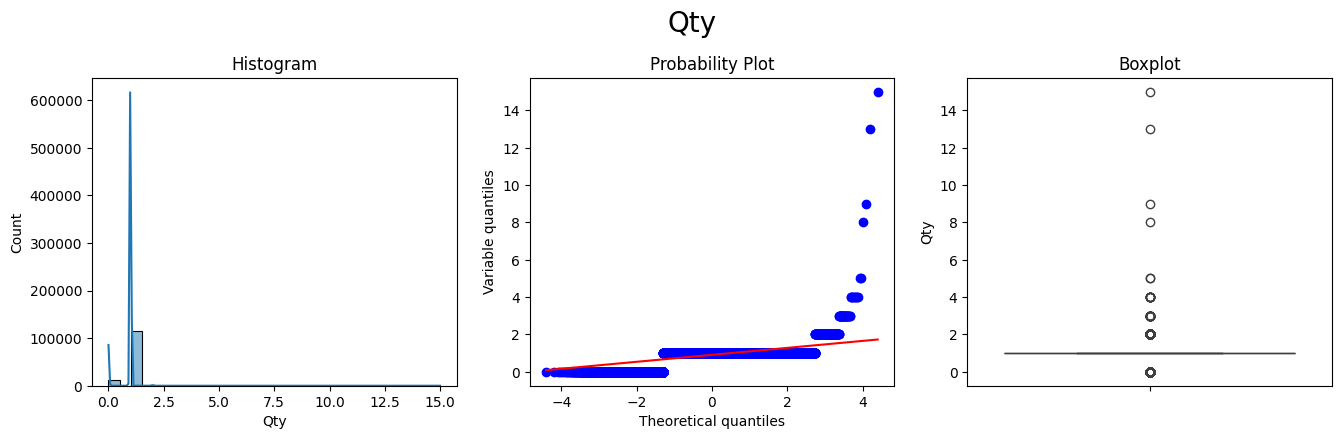

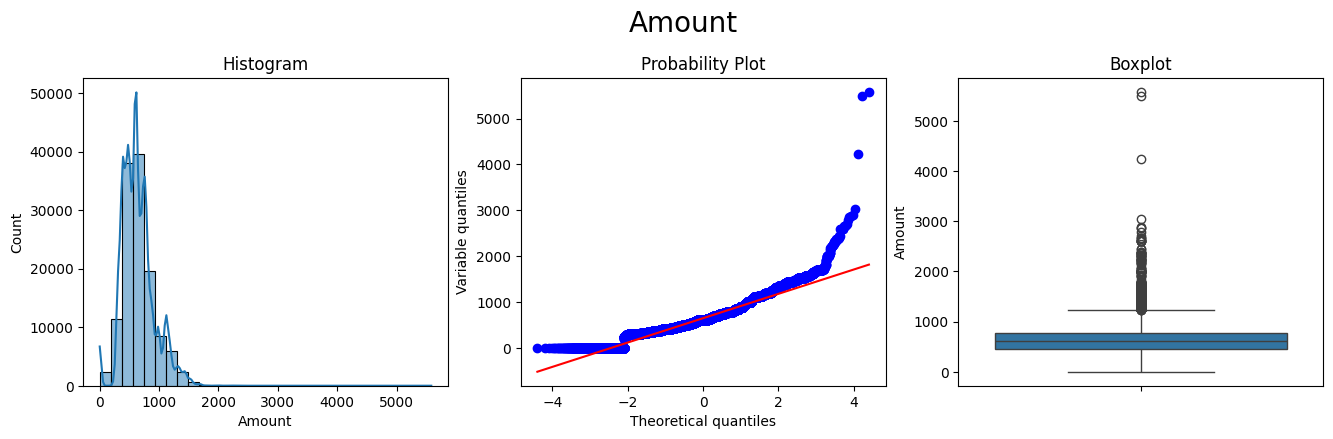

In [ ]:
#Looping untuk kolom yang ingin dibuat visualisasi plot
for col in numerical:
  check_plot(data_amazon,col)
  plt.suptitle(col, fontsize=20, y=1.05)
  plt.show()

**Interpretasi**
Berdasarkan check plot di atas, dapat diinterpretasikan sebagai berikut:

Kolom Qty

*   Histogram: Dari histogram kolom Qty menunjukkan bahwa nilai quantity berdistribusi asimetris (positive skew/right skew), yang menunjukkan adanya nilai outlier pada nilai yang sangat jauh dari median
*   Q-Q Plot: Berdasarkan Q-Q plot, untuk kolom Qty terdapat titik yang nilainya sangat jauh dari garis merah, jadi menunjukkan adanya outlier pada kolom tersebut
*   Boxplot: Berdasarkan boxplot di atas, untuk kolm Quantity menunjukkan bahwa rentang boxnya tidak jelas atau sangat kecil di bagian bawah, sehingga untuk kolom tersebut mempunyai outlier


Kolom Amount

*   Histogram: Dari histogram kolom Amount menunjukkan bahwa nilai Amount berdistribusi asimetris (positive skew/right skew), yang menunjukkan adanya nilai outlier pada nilai yang sangat jauh dari median
*   Q-Q Plot: Berdasarkan Q-Q plot, untuk kolom Amount terdapat titik yang nilainya sangat jauh dari garis merah, jadi menunjukkan adanya outlier pada kolom tersebut
*   Boxplot: Berdasarkan boxplot di atas, untuk kolm Amount menunjukkan bahwa rentang boxnya tidak jelas atau sangat kecil di bagian bawah, sehingga untuk kolom tersebut mempunyai outlier







In [ ]:
#Menghitung IQR untuk menentukan batas yang merupakan outlier

def check_outlier(data_amazon, variable):
  IQR = data_amazon[variable].quantile(0.75) - data_amazon[variable].quantile(0.25)

  batas_bawah = data_amazon[variable].quantile(0.25) - (IQR * 1.5)
  batas_atas = data_amazon[variable].quantile(0.75) + (IQR * 1.5)

  return batas_bawah, batas_atas

In [ ]:
#Batas atas dan bawah untuk kolom Amount
batas_bawah, batas_atas = check_outlier(data_amazon, 'Amount')
print(f'Nilai batas bawah: {batas_bawah}')
print(f'Nilai batas atas: {batas_atas}')

Nilai batas bawah: -9.0
Nilai batas atas: 1239.0


In [ ]:
batas_bawah, batas_atas = check_outlier(data_amazon, 'Amount')
data_amazon = data_amazon[(data_amazon['Amount'] <= batas_atas) & (data_amazon['Amount'] >= batas_bawah)]

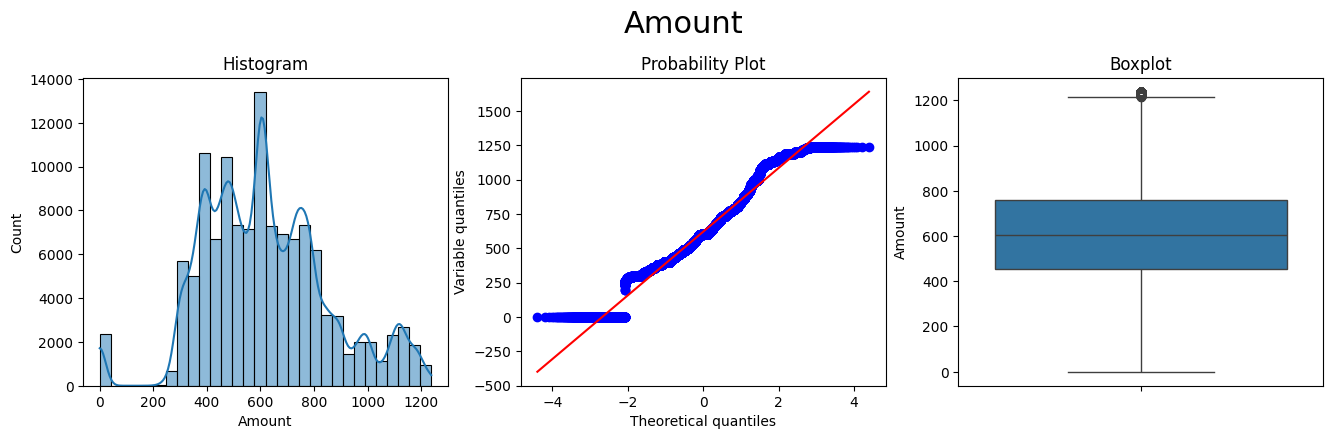

In [ ]:
check_plot(data_amazon, 'Amount')
plt.suptitle('Amount', fontsize=22, y=1.05)
plt.show()


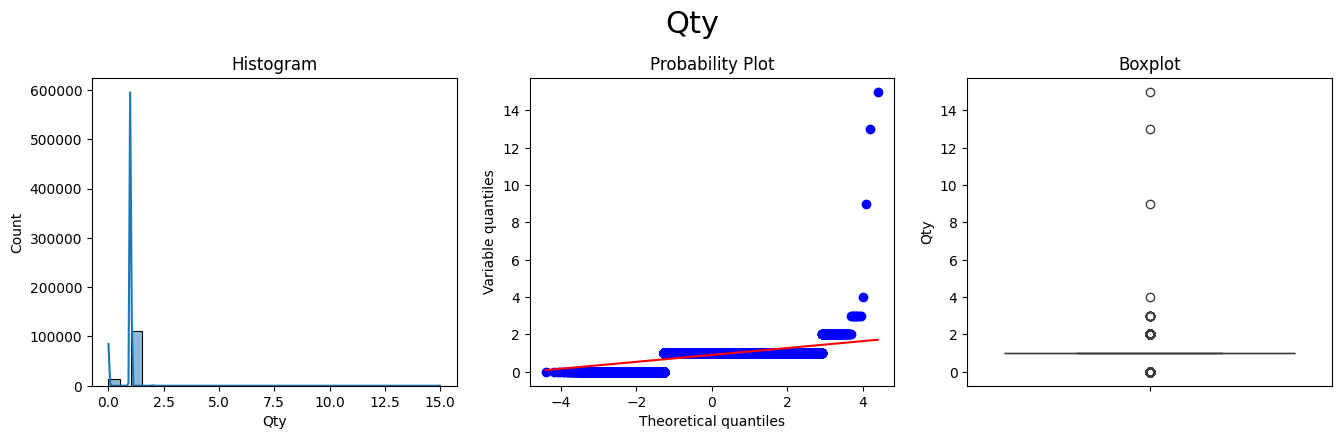

In [ ]:
check_plot(data_amazon, 'Qty')
plt.suptitle('Qty', fontsize=22, y=1.05)
plt.show()

**Interpretasi**

Kolom Qty

Pada kolom ini nilai outlier tidak di trim karena alesan sebagai berikut:
*   Jumlah Data Outlier Relatif Sedikit - Dari boxplot terlihat bahwa proporsi data yang terdeteksi sebagai outlier hanya sebagian kecil dibandingkan keseluruhan dataset. Hal ini mengindikasikan bahwa keberadaannya tidak akan mendistorsi analisis secara signifikan.
*   Valid secara bisnis — transaksi besar bisa terjadi pada pembelian grosir, promo besar, atau acara tertentu.
*   Berpotensi memberi insight — dapat mengungkap produk dengan pembelian besar, segmen pelanggan khusus, dan momen transaksi bernilai tinggi.

Kolom Amount

Setelah dilakukan trim pada outlier, nilai outlier pada kolom `Amount` menjadi nilai-nilai yang masih wajar dan dekat dengan nilai dalam range, sehingga untuk dataset sudah siap digunakan untuk EDA





In [ ]:
data_amazon.to_csv('data_amazon.csv', index=False)

In [ ]:
data_amazon.shape

(124634, 17)

# Exploratory Data Analytics (EDA)

## 1. Analisis Produk

### 1a. Evaluasi kategori produk paling laris dan paling menguntungkan.

In [ ]:
data_amazon.head()

Order ID       Date                        Status Fulfilment  \
0  405-8078784-5731545 2022-04-30                     Cancelled   Merchant   
1  171-9198151-1101146 2022-04-30  Shipped - Delivered to Buyer   Merchant   
2  404-0687676-7273146 2022-04-30                       Shipped     Amazon   
3  403-9615377-8133951 2022-04-30                     Cancelled   Merchant   
4  407-1069790-7240320 2022-04-30                       Shipped     Amazon   

  Sales Channel ship-service-level  Category Size Courier Status  Qty  \
0     Amazon.in           Standard   T-shirt    S     On the Way    0   
1     Amazon.in           Standard     Shirt  3XL        Shipped    1   
2     Amazon.in          Expedited     Shirt   XL        Shipped    1   
3     Amazon.in           Standard   Blazzer    L     On the Way    0   
4     Amazon.in          Expedited  Trousers  3XL        Shipped    1   

  currency  Amount    ship-city   ship-state ship-postal-code ship-country  \
0      INR  647.62       MUMBAI  MAHARASHTRA         400081.0           IN   
1      INR  406.00    BENGALURU    KARNATAKA         560085.0           IN   
2      INR  329.00  NAVI MUMBAI  MAHARASHTRA         410210.0           IN   
3      INR  753.33   PUDUCHERRY   PUDUCHERRY         605008.0           IN   
4      INR  574.00      CHENNAI   TAMIL NADU         600073.0           IN   

     B2B  
0  False  
1  False  
2   True  
3  False  
4  False

In [ ]:
#Grouping untuk menghitung kategori terlaris
category_counts_df = data_amazon.groupby('Category').size().sort_values(ascending=False).reset_index(name='Jumlah')
print(category_counts_df)

   Category  Jumlah
0     Shirt   49764
1   T-shirt   46265
2   Blazzer   15347
3  Trousers   10598
4   Perfume    1134
5    Wallet     925
6     Socks     439
7     Shoes     159
8     Watch       3


/tmp/ipython-input-279419720.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Jumlah', data=category_counts_df, palette='viridis')


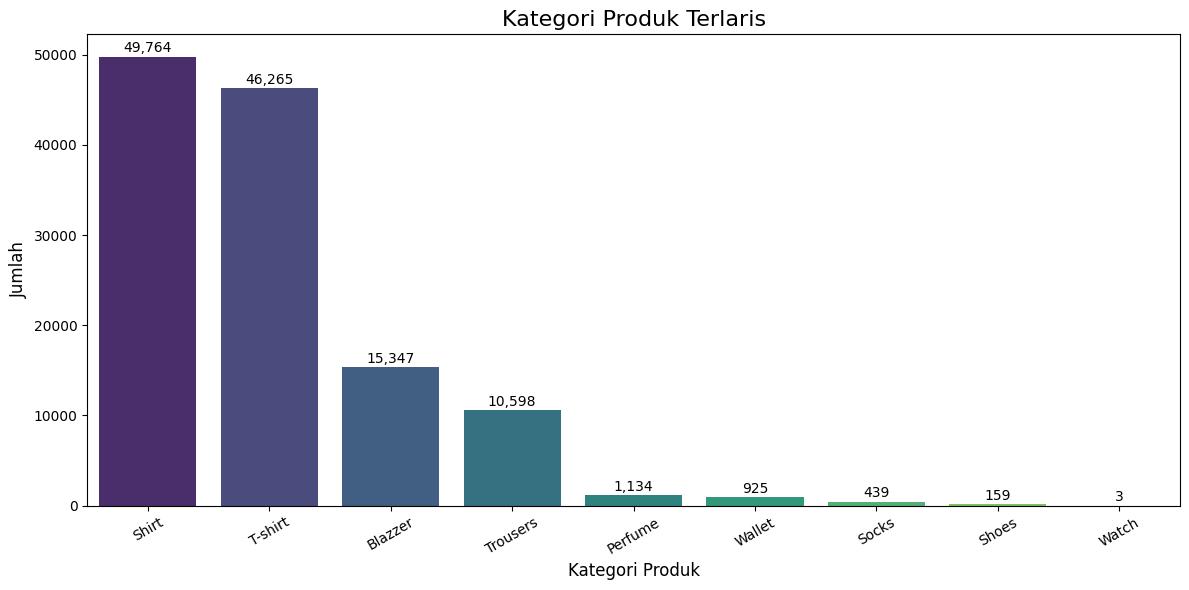

In [ ]:
# Visualisasi barplot
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Jumlah', data=category_counts_df, palette='viridis')

# Tambahkan angka di atas bar
for i, total in enumerate(category_counts_df['Jumlah']):
    plt.text(i, total + (0.01 * category_counts_df['Jumlah'].max()), f"{total:,.0f}",
             ha='center', fontsize=10, color='black')

# Menambahkan judul dan label
plt.title('Kategori Produk Terlaris', fontsize=16)
plt.xlabel('Kategori Produk', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.xticks(rotation=30)
plt.tight_layout()  # Menghindari teks terpotong
plt.show()

**Interpretasi**

Berdasarkan visualisasi di atas, untuk kategori produk terlaris adalah *Shirt* dengan total penjualan sebanyak 49.764 pcs. Disusul dengan kategori produk terlaris kedua adalah *T-Shirt* dengan jumlah terjual sebanyak 46.265 pcs. Sedangkan, untuk kategori produk yang paling sedikit dibeli adalah *watch* dengan jumlah terjual sebanyak 3 pcs.

In [ ]:
#Grouping untuk menghitung kategori paling menguntungkan
category_menguntungkan = data_amazon.groupby('Category')['Amount'].sum().sort_values(ascending=False).reset_index()
print(category_menguntungkan)

   Category       Amount
0   T-shirt  35529886.15
1     Shirt  23120763.22
2   Blazzer  11490924.55
3  Trousers   5603626.30
4   Perfume    797902.66
5    Wallet    484366.52
6     Socks    162497.50
7     Shoes    121682.76
8     Watch       915.00


/tmp/ipython-input-80269600.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Amount', data=category_menguntungkan, palette='viridis')


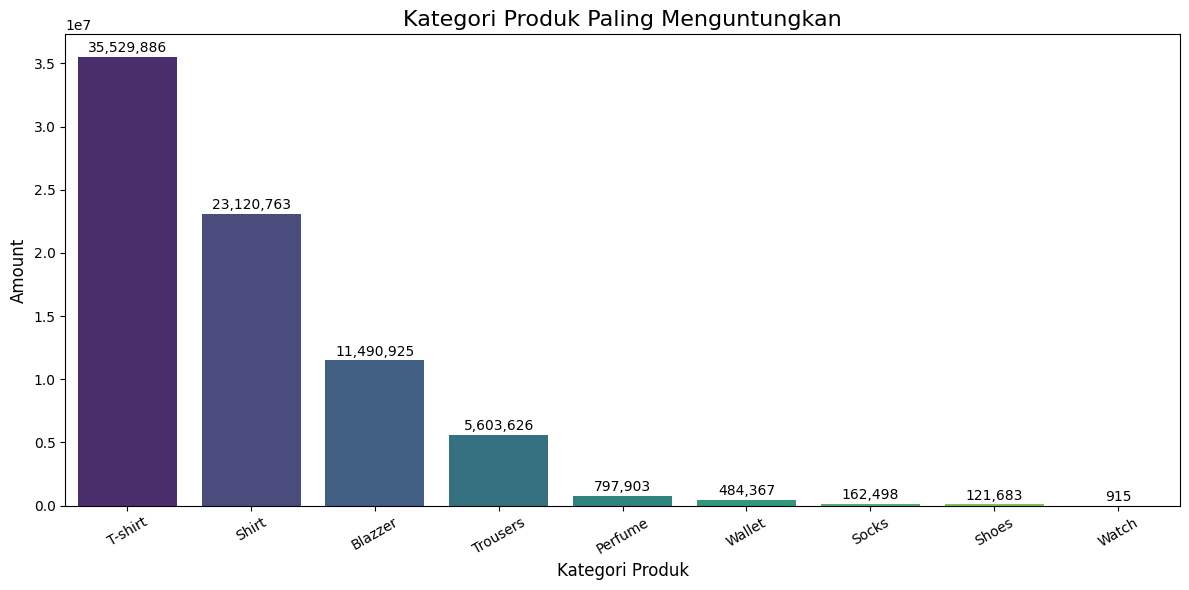

In [ ]:
# Visualisasi barplot
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Amount', data=category_menguntungkan, palette='viridis')

# Tambahkan angka di atas bar
for i, total in enumerate(category_menguntungkan['Amount']):
    plt.text(i, total + (0.01 * category_menguntungkan['Amount'].max()), f"{total:,.0f}",
             ha='center', fontsize=10, color='black')

# Menambahkan judul dan label
plt.title('Kategori Produk Paling Menguntungkan', fontsize=16)
plt.xlabel('Kategori Produk', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.xticks(rotation=30)
plt.tight_layout()  # Menghindari teks terpotong
plt.show()

**Interpretasi**

Untuk kategori produk paling menguntungkan adalah *T-Shirt* dengan total sales sebesar 35.529.886. Selanjutnya disusul oleh kategori produk *Shirt* dengan total sales sebesar 23.120.763

In [ ]:
#Menambahkan kolom nama bulan
data_amazon['Month'] = data_amazon['Date'].dt.month_name()
data_amazon.head()

Order ID       Date                        Status Fulfilment  \
0  405-8078784-5731545 2022-04-30                     Cancelled   Merchant   
1  171-9198151-1101146 2022-04-30  Shipped - Delivered to Buyer   Merchant   
2  404-0687676-7273146 2022-04-30                       Shipped     Amazon   
3  403-9615377-8133951 2022-04-30                     Cancelled   Merchant   
4  407-1069790-7240320 2022-04-30                       Shipped     Amazon   

  Sales Channel ship-service-level  Category Size Courier Status  Qty  \
0     Amazon.in           Standard   T-shirt    S     On the Way    0   
1     Amazon.in           Standard     Shirt  3XL        Shipped    1   
2     Amazon.in          Expedited     Shirt   XL        Shipped    1   
3     Amazon.in           Standard   Blazzer    L     On the Way    0   
4     Amazon.in          Expedited  Trousers  3XL        Shipped    1   

  currency  Amount    ship-city   ship-state ship-postal-code ship-country  \
0      INR  647.62       MUMBAI  MAHARASHTRA         400081.0           IN   
1      INR  406.00    BENGALURU    KARNATAKA         560085.0           IN   
2      INR  329.00  NAVI MUMBAI  MAHARASHTRA         410210.0           IN   
3      INR  753.33   PUDUCHERRY   PUDUCHERRY         605008.0           IN   
4      INR  574.00      CHENNAI   TAMIL NADU         600073.0           IN   

     B2B  Month  
0  False  April  
1  False  April  
2   True  April  
3  False  April  
4  False  April

/tmp/ipython-input-4000621149.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_amazon["Month"] = pd.Categorical(df_amazon["Month"], categories=month_order, ordered=True)
/tmp/ipython-input-4000621149.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_df = df_amazon.groupby(["Month","Category"]).agg(


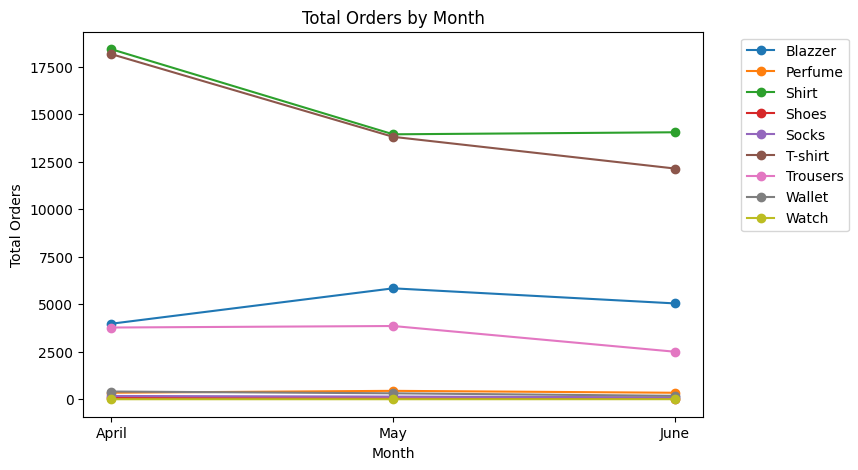

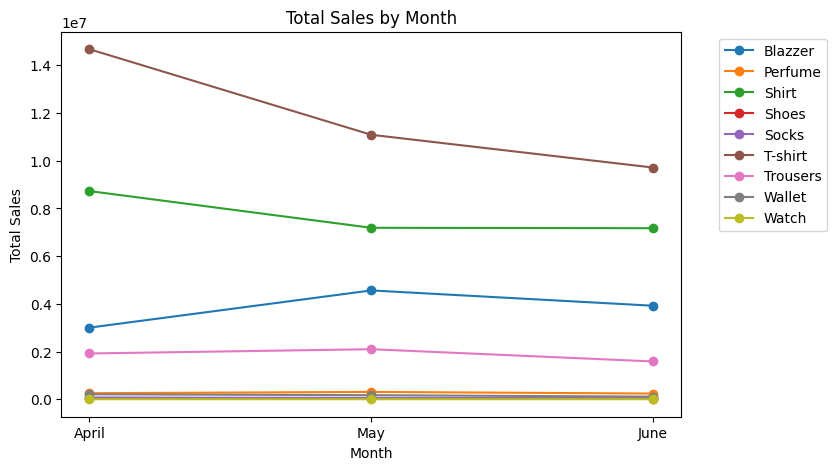

In [ ]:
df_amazon = data_amazon[data_amazon["Month"] != "March"]
month_order = ["April", "May", "June"]
df_amazon["Month"] = pd.Categorical(df_amazon["Month"], categories=month_order, ordered=True)

# --- STEP 2: Hitung Total_Order & Total_Sales per Month-Category ---
agg_df = df_amazon.groupby(["Month","Category"]).agg(
    Total_Order=("Order ID", "nunique"),
    Total_Sales=("Amount", "sum")
).reset_index()

# --- STEP 3: Plot Line Chart Total Orders ---
plt.figure(figsize=(8,5))
for category in agg_df['Category'].unique():
    subset = agg_df[agg_df['Category'] == category]
    plt.plot(subset['Month'], subset['Total_Order'], marker='o', label=category)

plt.title("Total Orders by Month")
plt.xlabel("Month")
plt.ylabel("Total Orders")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

# --- STEP 4: Plot Line Chart Total Sales ---
plt.figure(figsize=(8,5))
for category in agg_df['Category'].unique():
    subset = agg_df[agg_df['Category'] == category]
    plt.plot(subset['Month'], subset['Total_Sales'], marker='o', label=category)

plt.title("Total Sales by Month")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

### 1b. Kategori produk apa yang paling sering dibeli dalam jumlah banyak (>1)?

In [ ]:
data_amazon.groupby('Category')['Qty'].value_counts()

Category  Qty
Blazzer   1      13745
          0       1598
          2          4
Perfume   1       1022
          0        109
          2          3
Shirt     1      44562
          0       5055
          2        137
          3          7
          4          1
          9          1
          13         1
Shoes     1        143
          0         16
Socks     1        390
          0         45
          2          4
T-shirt   1      41198
          0       5038
          2         28
          3          1
Trousers  1       9826
          0        751
          2         21
Wallet    1        834
          0         84
          2          4
          3          2
          15         1
Watch     1          3
Name: count, dtype: int64

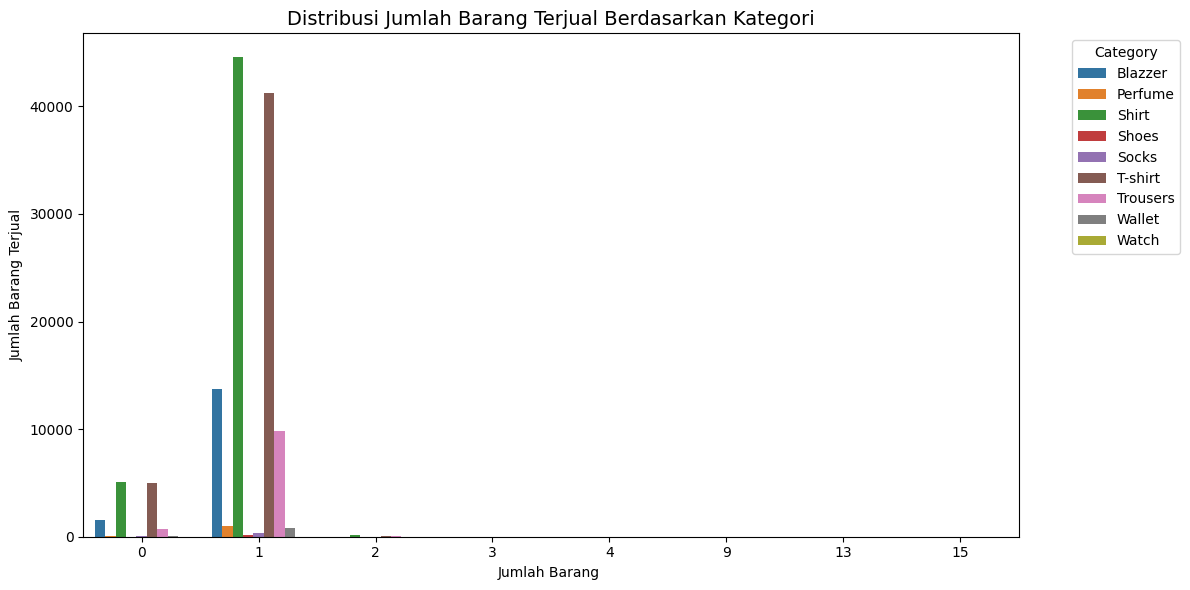

In [ ]:
# Group & count
qty_counts = (
    data_amazon.groupby('Category')['Qty']
    .value_counts()
    .reset_index(name='Count')
)

# Urutkan biar rapi
qty_counts = qty_counts.sort_values(by=['Category', 'Qty'])

# Plot
plt.figure(figsize=(12,6))
sns.barplot(
    data=qty_counts,
    x='Qty',
    y='Count',
    hue='Category'
)

plt.title('Distribusi Jumlah Barang Terjual Berdasarkan Kategori', fontsize=14)
plt.xlabel('Jumlah Barang ')
plt.ylabel('Jumlah Barang Terjual')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Interpretasi**

Berdasarkan chart "Distribusi Jumlah Barang Terjual Berdasarkan Kategori", untuk jumlah order paling banyak adalah order dengan jumlah barang 1. Dan untuk kategorinya adalah Shirt dan disusul oleh Tshirt.

In [ ]:
# Filter for rows where Qty is 0 and then group by Status to see the counts for each status
data_amazon[data_amazon['Qty'] == 0].groupby('Status').size()

Status
Cancelled                       12590
Pending                             2
Shipped                            93
Shipped - Delivered to Buyer        8
Shipped - Returned to Seller        3
dtype: int64

**Interpretasi**

Berdasarkan chart "Distribusi Jumlah Barang Terjual Berdasarkan Kategori" kita bisa melihat bahwa terdapat barang yang diorder dengan jumlah 0. Di mana, seharusnya untuk quantity yang terjual tidak boleh 0. Setelah dilakukan pengecekan, untuk barang dengan quantity 0 adalah barang dengan penjelasan statusnya seperti berrikut:

1. Transaksi Dibatalkan (Cancelled)
Alasan paling utama adalah karena pesanan tersebut dibatalkan. Pada tangkapan layar, terlihat bahwa 12.590 entri dengan Qty = 0 memiliki Status Cancelled. Artinya, pesanan tersebut dibuat tetapi tidak pernah dikirimkan, sehingga jumlah produk yang terjual tercatat nol.

2. Pesanan Tertunda (Pending)
Beberapa pesanan mungkin masih dalam status Pending. Ini berarti pesanan sudah tercatat tetapi belum diproses atau dikirim, sehingga kuantitasnya masih 0.

3. Barang Dikembalikan (Returned)
Meskipun jumlahnya kecil, ada kemungkinan beberapa entri dengan Qty = 0 adalah pesanan yang telah dikirim (Shipped) namun dikembalikan oleh pembeli (Returned to Seller). Karena barang kembali ke penjual, kuantitas efektif yang terjual menjadi nol.

Untuk yang statusnya shipped dan shipped - delivered to buyer seharusnya > 0. Untuk jumlahnya adalah 0 kemungkinan karena:

1. Kesalahan Entri Data: Qty seharusnya tercatat 1 atau lebih, tapi terinput 0 secara keliru.

2. Kesalahan Sistem: Sebuah pesanan mungkin dibatalkan, tapi status pengirimannya (seperti Shipped) tetap diperbarui.

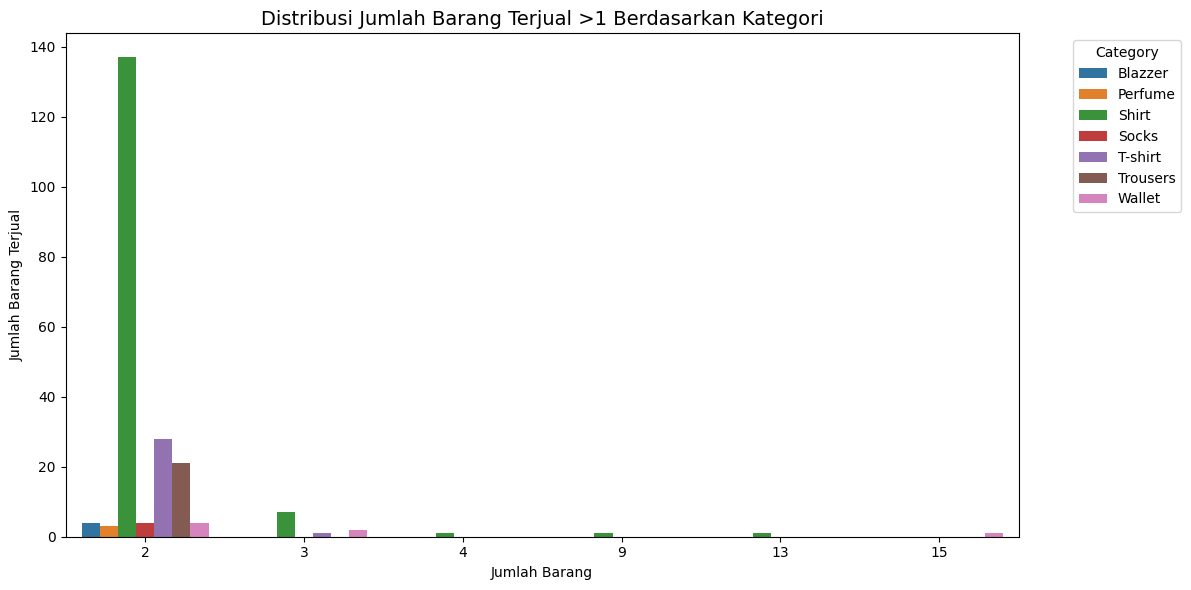

In [ ]:
# Filter Qty > 1
filtered_data = data_amazon[data_amazon['Qty'] > 1]

# Group & count
qty_counts = (
    filtered_data.groupby('Category')['Qty']
    .value_counts()
    .reset_index(name='Count')
)

# Urutkan biar rapi
qty_counts = qty_counts.sort_values(by=['Category', 'Qty'])

# Plot
plt.figure(figsize=(12,6))
sns.barplot(
    data=qty_counts,
    x='Qty',
    y='Count',
    hue='Category'
)

plt.title('Distribusi Jumlah Barang Terjual >1 Berdasarkan Kategori', fontsize=14)
plt.xlabel('Jumlah Barang')
plt.ylabel('Jumlah Barang Terjual')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Interpretasi**

Berdasarkan chart "Distribusi Jumlah Barang Terjual Berdasarkan Kategori", rata-rata barang yang terjual paling banyak adalah Qty 1. Tetapi, berdasarkan chart "Distribusi Jumlah Barang Terjual >1 Berdasarkan Kategori", untuk Qty terjual paling banyak selanjutnya adalah Qty 2 dengan kategori Shirt dan disusul oleh T-Shirt.

Selain itu, ternyata ada customer yang memberik produk dengan Qty 3, 4, 9. 13, dan 15. Di mana Qty 3, 4, 9, dan 13 adalah kategori Shirt yang paling banyak di beli. Sedangkan untuk Qty 15 adalah kategori wallet

## 2. Analisis Tren Penjualan

### 2a. Apakah ada lonjakan atau penurunan penjualan yang signifikan di tanggal atau bulan tertentu?.

In [ ]:
#Grouping total amount per date
sales_trend = data_amazon.groupby('Date')['Amount'].sum().reset_index()
sales_trend

Date      Amount
0  2022-03-31   102562.85
1  2022-04-01   870207.60
2  2022-04-02   912851.53
3  2022-04-03  1006601.38
4  2022-04-04   887062.22
5  2022-04-05   949146.05
6  2022-04-06   892422.26
7  2022-04-07   899357.35
8  2022-04-08  1009441.61
9  2022-04-09   973805.48
10 2022-04-10  1056745.37
11 2022-04-11   949075.27
12 2022-04-12   875307.25
13 2022-04-13   974566.73
14 2022-04-14  1124657.27
15 2022-04-15  1071265.31
16 2022-04-16  1041652.51
17 2022-04-17   942915.60
18 2022-04-18   902398.03
19 2022-04-19   971735.36
20 2022-04-20  1097429.41
21 2022-04-21   999355.58
22 2022-04-22   985994.29
23 2022-04-23  1095494.62
24 2022-04-24  1080037.70
25 2022-04-25   987535.35
26 2022-04-26   853690.55
27 2022-04-27   850933.47
28 2022-04-28   821087.52
29 2022-04-29   851351.89
30 2022-04-30   971542.20
31 2022-05-01  1080335.52
32 2022-05-02  1205520.07
33 2022-05-03  1209923.02
34 2022-05-04  1194109.24
35 2022-05-05   882505.14
36 2022-05-06   853245.92
37 2022-05-07   879967.76
38 2022-05-08   851284.49
39 2022-05-09   760772.07
40 2022-05-10   699617.27
41 2022-05-11   720162.52
42 2022-05-12   667182.93
43 2022-05-13   678438.12
44 2022-05-14   736942.08
45 2022-05-15   884347.63
46 2022-05-16   753495.43
47 2022-05-17   732942.77
48 2022-05-18   791748.26
49 2022-05-19   753779.86
50 2022-05-20   674892.37
51 2022-05-21   666512.08
52 2022-05-22   763481.83
53 2022-05-23   733456.27
54 2022-05-24   751951.57
55 2022-05-25   786376.52
56 2022-05-26   736182.60
57 2022-05-27   791637.57
58 2022-05-28   809153.60
59 2022-05-29   811241.67
60 2022-05-30   792142.77
61 2022-05-31   851188.70
62 2022-06-01   912785.21
63 2022-06-02   854688.82
64 2022-06-03   728830.19
65 2022-06-04   857322.10
66 2022-06-05   968671.28
67 2022-06-06   923159.02
68 2022-06-07   934469.15
69 2022-06-08   970602.98
70 2022-06-09   932158.45
71 2022-06-10   771644.94
72 2022-06-11   822775.34
73 2022-06-12   943239.82
74 2022-06-13   848305.25
75 2022-06-14   863751.01
76 2022-06-15   782523.32
77 2022-06-16   760328.50
78 2022-06-17   729953.10
79 2022-06-18   718792.77
80 2022-06-19   709928.60
81 2022-06-20   729365.73
82 2022-06-21   797036.40
83 2022-06-22   771700.77
84 2022-06-23   646731.59
85 2022-06-24   591880.29
86 2022-06-25   633345.08
87 2022-06-26   757020.02
88 2022-06-27   695569.49
89 2022-06-28   749260.42
90 2022-06-29   393957.76

In [ ]:
#Grouping total amount per bulan
sales_trend = data_amazon.groupby('Month')['Amount'].sum().reset_index()
sales_trend

Month       Amount
0  April  28905666.76
1   June  22799797.40
2  March    102562.85
3    May  25504537.65

In [ ]:
#Membuat bulannya jadi berurutan
month_ordered = ['January', 'February', 'March', 'April', 'May', 'June',
              'July', 'August', 'September', 'October', 'November', 'December']

# Use the monthly sales trend DataFrame
monthly_sales_trend = data_amazon.groupby('Month')['Amount'].sum().reset_index()

monthly_sales_trend['Month'] = pd.Categorical(
    monthly_sales_trend['Month'],
    categories=month_ordered,
    ordered=True
)
monthly_sales_trend = monthly_sales_trend.sort_values('Month').reset_index(drop=True)
monthly_sales_trend

Month       Amount
0  March    102562.85
1  April  28905666.76
2    May  25504537.65
3   June  22799797.40

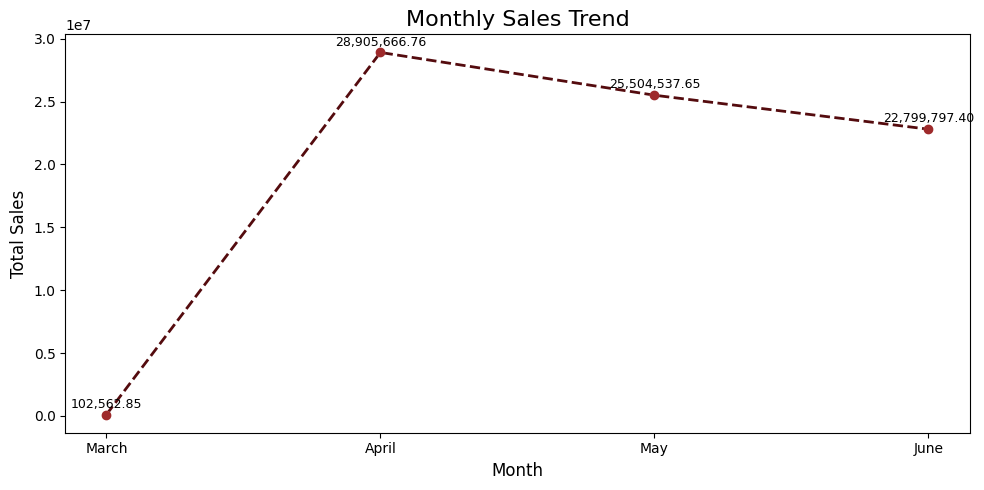

In [ ]:
#Memvisualisasikan tren sales
plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_sales_trend, x='Month', y='Amount', marker='o', linestyle='--', color='#540b0e', linewidth=2,)

#Menambahkan label dan titik pada setiap label
for x, y in zip(monthly_sales_trend['Month'], monthly_sales_trend['Amount']):
    plt.plot(x, y, 'o', color='#9e2a2b')
    plt.text(x, y + 550000, f"{y:,.2f}", ha='center', fontsize=9)

#Menambahkan judul
plt.xticks()
plt.title("Monthly Sales Trend", fontsize = 16)
plt.xlabel("Month", fontsize = 12)
plt.ylabel("Total Sales",fontsize = 12)
plt.tight_layout()
plt.show()

**Interpretasi**:

Untuk Monthly Sales Trend setiap bulannya setelah bulan april mengalami penurunan.

Untuk dari bulan Maret ke April mengalami kenaikan drastis karena data yang di bulan Maret hanya data 1 hari saja, yaitu tanggal 31-Maret-2022

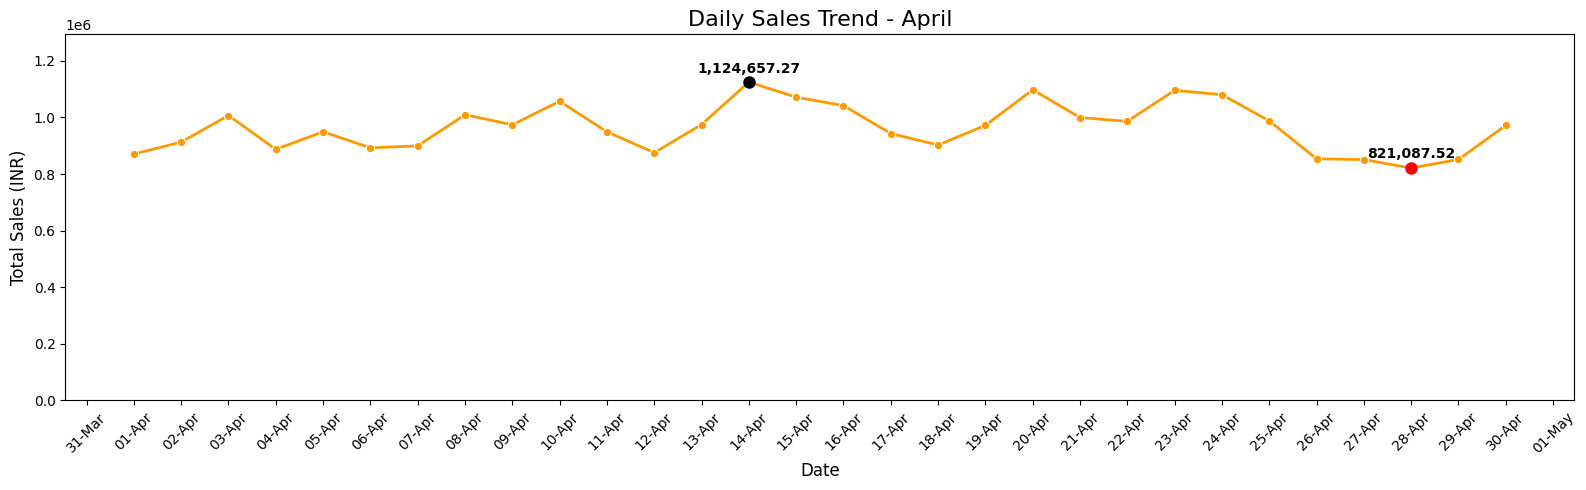

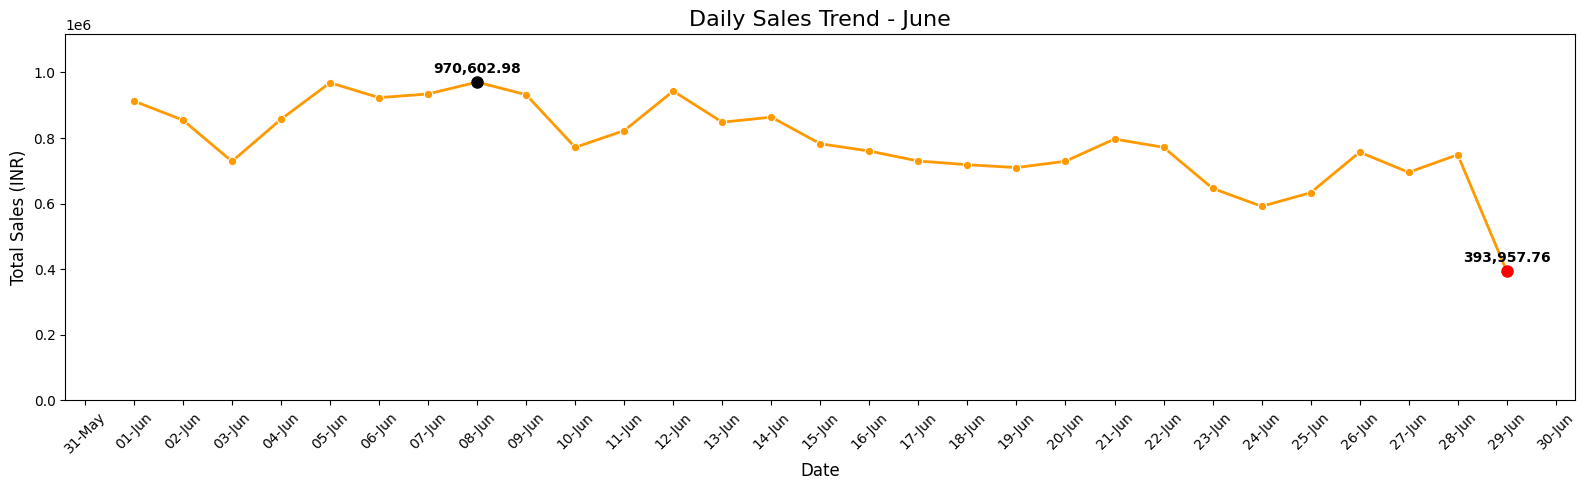

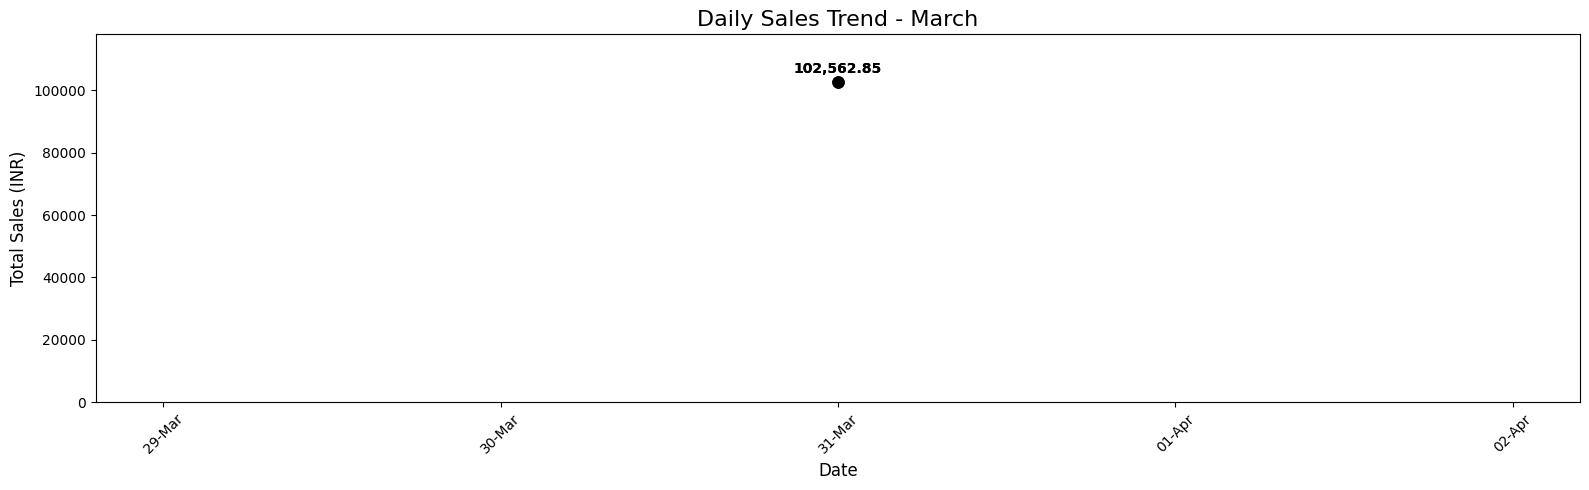

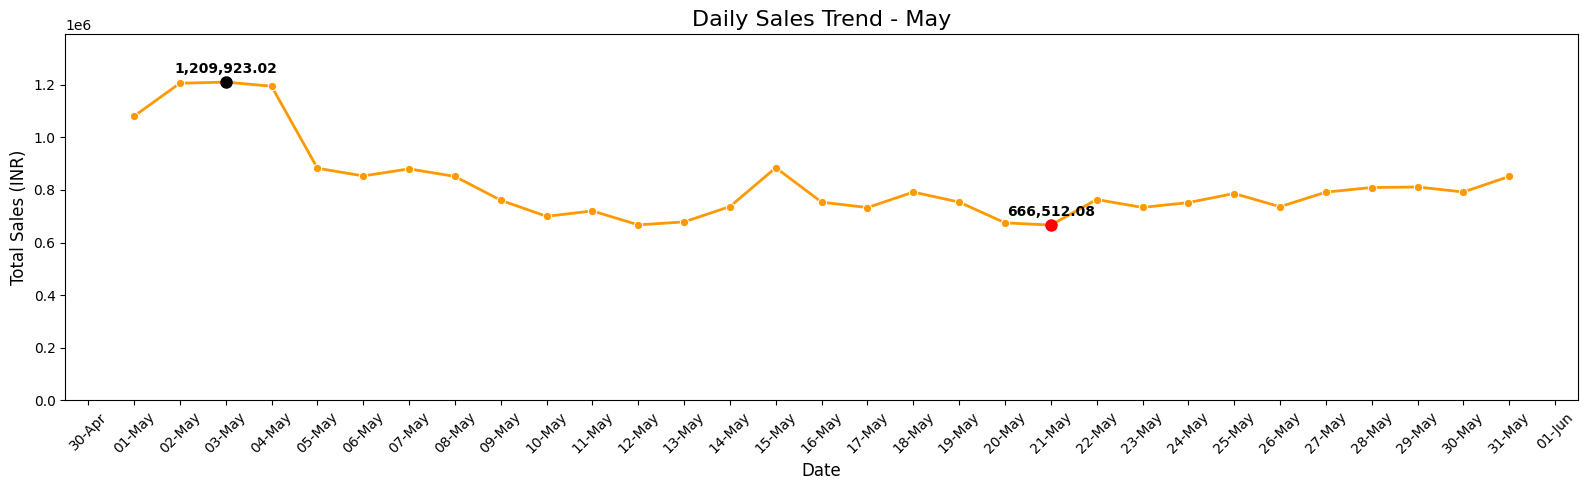

In [ ]:
#Membuat daily sales trend per bulan
for period, group in data_amazon.groupby('Month'):
    # Hitung total sales per hari
    daily_sales = group.groupby('Date')['Amount'].sum().reset_index(name='Total Amount')

    # Plot
    plt.figure(figsize=(16, 5))
    sns.lineplot(data=daily_sales, x='Date', y='Total Amount', marker='o', linestyle='-',
                 color='#FF9900', linewidth=2)

    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))

   # Tentukan batas Y supaya label tidak keluar frame
    max_y = daily_sales['Total Amount'].max()
    plt.ylim(0, max_y * 1.15)  # Naikkan 15% di atas titik tertinggi

     # Cari nilai max dan min
    idx_max = daily_sales['Total Amount'].idxmax()
    idx_min = daily_sales['Total Amount'].idxmin()

    # Plot titik max dan min
    for idx in [idx_max, idx_min]:
        x = daily_sales.loc[idx, 'Date']
        y = daily_sales.loc[idx, 'Total Amount']
        plt.plot(x, y, 'o', color='black' if idx == idx_max else 'red', markersize=8)
        plt.text(x, y + (max_y * 0.03), f"{y:,.2f}", ha='center', fontsize=10, fontweight='bold')

    # Judul dan label
    plt.xticks(rotation=45)
    plt.title(f"Daily Sales Trend - {period}", fontsize=16)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Total Sales (INR)", fontsize=12)
    plt.tight_layout()
    plt.show()

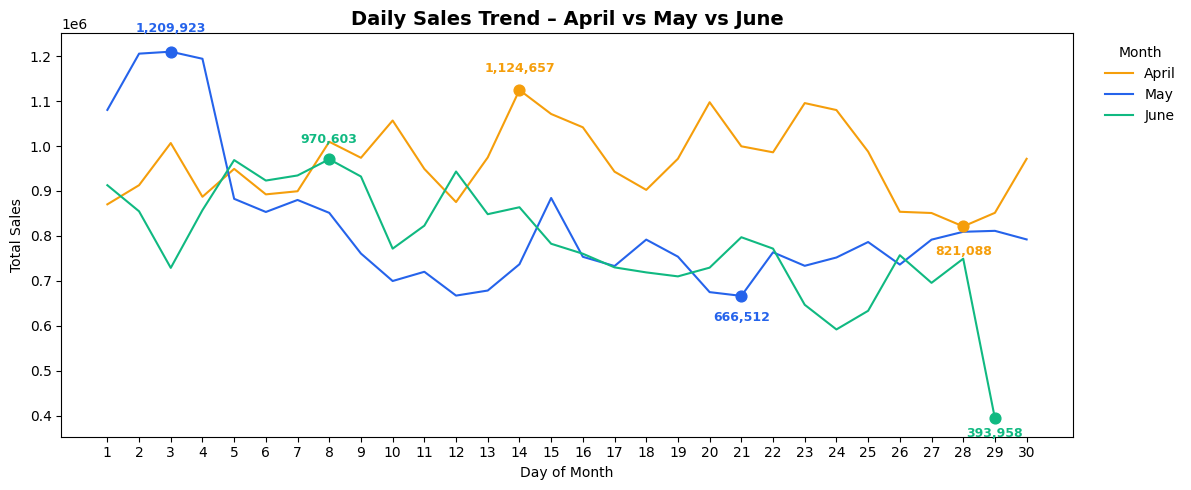

In [ ]:

# Pastikan df sudah ada dengan kolom Date & Amount
df = df.copy()
df["Date"] = pd.to_datetime(df["Date"])
df["Month"] = df["Date"].dt.month_name()
df["Day"]   = df["Date"].dt.day

# Ambil hanya April–June dan batasi tanggal <= 30
months = ["April", "May", "June"]
df_use = df[df["Month"].isin(months) & (df["Day"] <= 30)]

# Agregasi sales per Day x Month
agg = (df_use.groupby(["Day","Month"], as_index=False)["Amount"]
              .sum()
              .rename(columns={"Amount": "Total_Sales"}))

# Pivot ke wide format: index=Day, kolom=Month
pivot = agg.pivot(index="Day", columns="Month", values="Total_Sales") \
           .reindex(range(1,31))

# ====== PLOT ======
colors = {"April": "#F59E0B", "May": "#2563EB", "June": "#10B981"}

plt.figure(figsize=(12,5))
for m in months:
    if m in pivot.columns:
        s = pivot[m]
        plt.plot(pivot.index, s, marker=None, linewidth=1.5, label=m, color=colors[m])

        if s.notna().any():
            # Peak & Low
            d_max, v_max = int(s.idxmax()), float(s.max())
            d_min, v_min = int(s.idxmin()), float(s.min())

            # Hanya dot di max & min
            plt.scatter([d_max],[v_max], s=60, color=colors[m], zorder=5)
            plt.scatter([d_min],[v_min], s=60, color=colors[m], zorder=5)

            # Label angka sederhana
            plt.text(d_max, v_max+0.03*v_max, f"{v_max:,.0f}",
                     ha="center", va="bottom", fontsize=9, color=colors[m], weight="bold")
            plt.text(d_min, v_min-0.05*v_min, f"{v_min:,.0f}",
                     ha="center", va="top", fontsize=9, color=colors[m], weight="bold")

plt.title("Daily Sales Trend – April vs May vs June", fontsize=14, weight="bold")
plt.xlabel("Day of Month")
plt.ylabel("Total Sales")
plt.xticks(range(1,31))
plt.legend(title="Month", bbox_to_anchor=(1.02, 1), loc="upper left", frameon=False)
plt.tight_layout()
plt.show()

**Interpretasi**

April:

Untuk bulan April sales cenderung naik turun dengan puncaknya di tanggal 14-Apr dengan total sales sebanyak 1.124.657,27. Setelah puncak trendnya masih naik turun dan di sekitar 8 hari terakhir di bulan April sales terus mengalami penurunan sampai pada titik terendah, yaitu di tanggal 28-Apr dengan total sales sebanyak 821.087,52. Namun, setelah mencapai titik terendah untuk 2 hari terakhir sampai awal bulan Mei terus menunjukkan peningkatan

Mei:

2 hari terakhir bulan April sampai 3 hari pertama di bulan Mei trend mengalami peningkatan sampai pada puncaknya di tanggal 3 Mei dengan total sales sebanyak 1.209.923,02. Setelah puncak, trendnya cenderung terus turun dan sempat turun drastis di tanggal 5-Mei. Dan penurunan terus berlanjut sampai titik terendah berada di tanggal 21-Mei dengan total sales sebanyak 666.512,08. Setelah titik terendah, trend mengalami kenaikan sampai akhir Mei tetapi kenaikannya sangat tipis.

Juni:

Di awal bulan Juni trend menunjukkan penurunan, tetapi meningkat kembali setelah tanggal 3 Juni dan puncaknya di tanggal 8-Juni dengan total sales sebanyak 970.602,98. Setelah puncak, trend cenderung mengalami penurunan dan di akhir bulan Juni mengalami penurunan drastis pada tanggal 29-Jun dengan total sales sebanyak 393.957,76


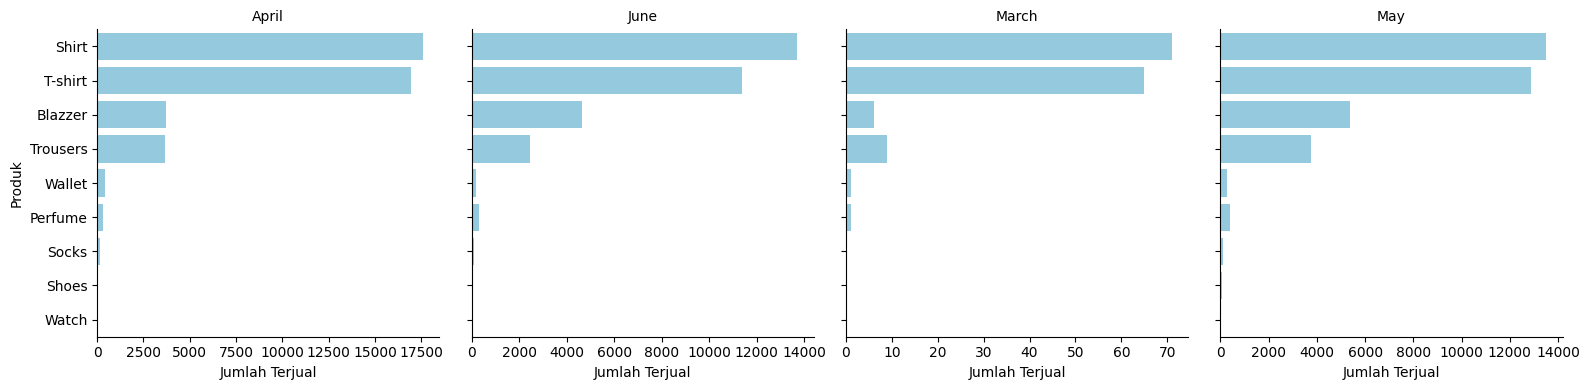

In [ ]:
# Kelompokkan data berdasarkan bulan & produk
produk_bulanan = (
    data_amazon.groupby(['Month', 'Category'], as_index=False)['Qty']
    .sum()
    .sort_values(by=['Month', 'Qty'], ascending=[True, False])
)

# Visualisasi: FacetGrid, tiap bulan 1 chart
g = sns.FacetGrid(produk_bulanan, col='Month', col_wrap=4, height=4, sharex=False)
g.map_dataframe(sns.barplot, x='Qty', y='Category', color='skyblue')
g.set_titles(col_template='{col_name}')
g.set_axis_labels("Jumlah Terjual", "Produk")
plt.tight_layout()
plt.show()

## 3. Analisis performa metode fulfillment/pengiriman

### 3a. Customer behavior berdasarkan metode fulfillment dan ship-service level

In [ ]:
# Grouping sales by fulfillment
data_amazon.groupby('Fulfilment')['Amount'].sum()

Fulfilment
Amazon      53784008.00
Merchant    23528556.66
Name: Amount, dtype: float64

In [ ]:
# grouping sales bt ship-service-level
data_amazon.groupby('ship-service-level')['Amount'].sum()

ship-service-level
Expedited    53648019.00
Standard     23664545.66
Name: Amount, dtype: float64

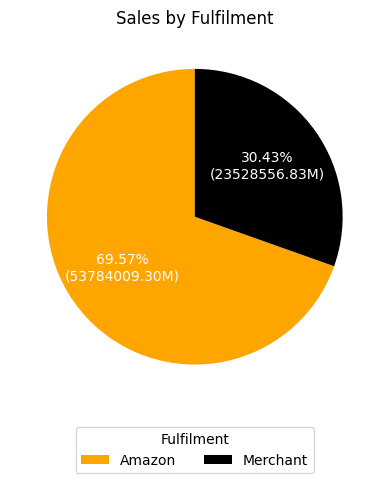

In [ ]:
# Ambil data hasil groupby
fulfillment_data = data_amazon.groupby('Fulfilment')['Amount'].sum()

# Labels dan values
labels = fulfillment_data.index
sizes = fulfillment_data.values

# Warna bisa disesuaikan (Amazon = orange, Merchant = black)
colors = ['orange' if 'Amazon' in label else 'black' for label in labels]

# Pie chart
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    sizes,
    colors=colors,
    autopct=lambda pct: f"{pct:.2f}%\n({pct * sum(sizes)/100:.2f}M)",
    startangle=90,
    textprops={'color':"white"}
)

# Tambah legend
ax.legend(
    wedges,
    labels,
    title="Fulfilment",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.05),  # atur posisi legend
    ncol=2
)

# Judul
plt.title("Sales by Fulfilment")
plt.show()

**Interpretasi**

CUstomer di India lebih dominan menggunakan metode fulfillment amazon

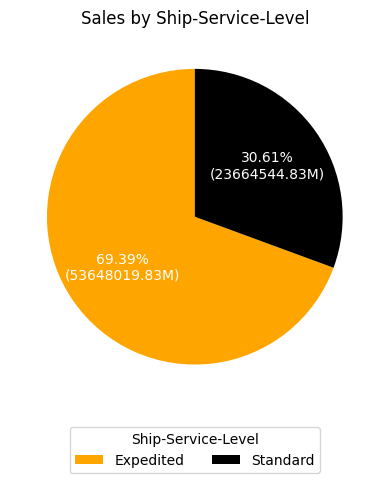

In [ ]:
# Ambil data hasil groupby
ship_service_level = data_amazon.groupby('ship-service-level')['Amount'].sum()

# Labels dan values
labels = ship_service_level.index
sizes = ship_service_level.values

# Menambahkan warna
colors = ['orange' if 'Expedited' in label else 'black' for label in labels]

# Pie chart
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    sizes,
    colors=colors,
    autopct=lambda pct: f"{pct:.2f}%\n({pct * sum(sizes)/100:.2f}M)",
    startangle=90,
    textprops={'color':"white"}
)

# Tambah legend
ax.legend(
    wedges,
    labels,
    title="Ship-Service-Level",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.05),  # atur posisi legend
    ncol=2
)

# Judul
plt.title("Sales by Ship-Service-Level")
plt.show()

Interpretasi

Customer lebih dominan menggunakan ship service level 'expedited' karena lebih cepat sampai

### 3b. Metode pengiriman yang paling sering dipilih tiap kategori produk.

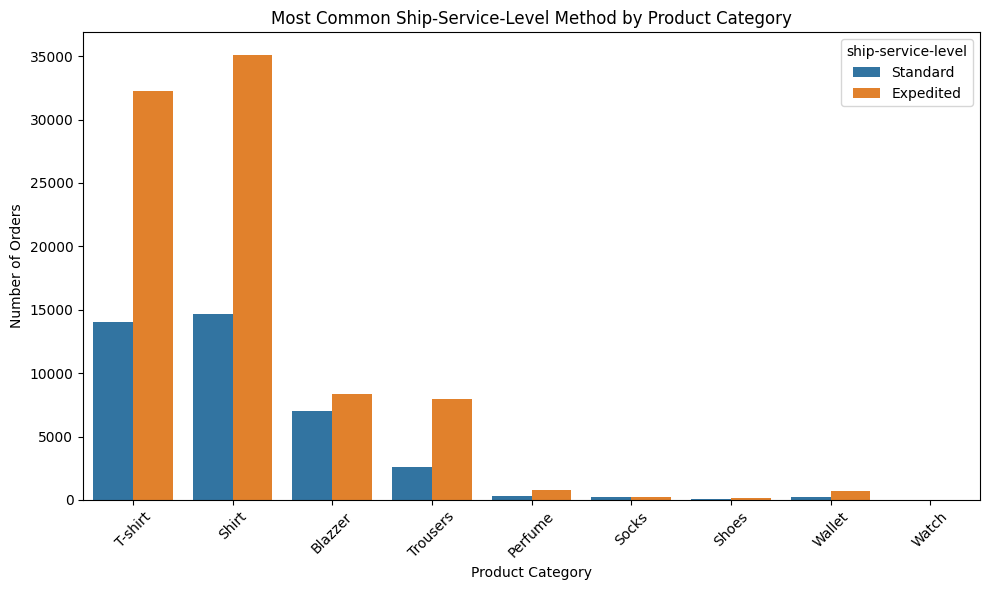

In [ ]:
# ---  Metode Pengiriman Terbanyak per Kategori Produk ---
plt.figure(figsize=(10,6))
sns.countplot(
    data=data_amazon,
    x='Category',
    hue='ship-service-level'
)
plt.title('Most Common Ship-Service-Level Method by Product Category')
plt.ylabel('Number of Orders')
plt.xlabel('Product Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Interpretasi

Grafik "Most Common Ship-Service-Level Method by Product Category" menunjukkan preferensi pelanggan yang kuat untuk layanan pengiriman Expedited dibandingkan Standard, terutama untuk produk-produk terlaris seperti T-shirt dan Shirt. Ini mengindikasikan bahwa kecepatan pengiriman adalah faktor penting bagi pelanggan yang membeli produk utama, dan ini bisa menjadi keunggulan kompetitif atau area yang perlu dikelola dengan hati-hati.

## 4. Analisis Geografis

### 4a. Kota atau negara bagian mana yang memiliki volume penjualan tertinggi?

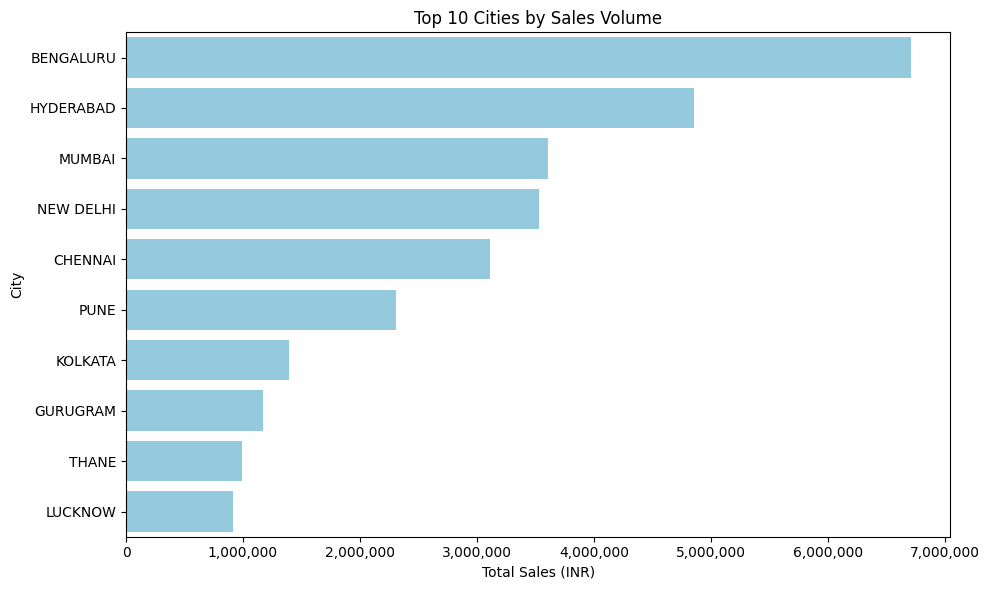

In [ ]:
# ===================== 1. Kota/Negara Bagian dengan Penjualan Tertinggi =====================
city_sales = data_amazon.groupby('ship-city')['Amount'].sum().reset_index()
city_sales = city_sales.sort_values('Amount', ascending=False).head(10)  # top 10 kota

plt.figure(figsize=(10,6))
sns.barplot(data=city_sales, x='Amount', y='ship-city', color='skyblue')
plt.xlabel('Total Sales (INR)')
plt.ylabel('City')
plt.title('Top 10 Cities by Sales Volume')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.tight_layout()
plt.show()

**Interpretasi**:

Bengaluru adalah pasar utama dan penyumbang penjualan terbesar, tetapi performanya menunjukkan tren penurunan. Penjualan di kota ini turun dari 2.5M pada bulan April  menjadi 2.3M pada bulan Mei dan Juni.

Posisi Kedua yang Stabil: Hyderabad secara konsisten menjadi pasar terbesar kedua dengan volume penjualan yang relatif stabil, berkisar di angka 1.8M - 1.9M.

Pasar yang Lemah: Kota-kota lain seperti Mumbai, Chennai, dan New Delhi berada di peringkat bawah dengan penjualan yang lebih rendah dan juga menunjukkan penurunan dari bulan ke bulan, khususnya Mumbai yang turun dari 1.6M pada April menjadi 1.2M di Juni.

### 4b. Apakah ada produk-produk tertentu yang lebih populer di suatu wilayah dibandingkan wilayah lain?

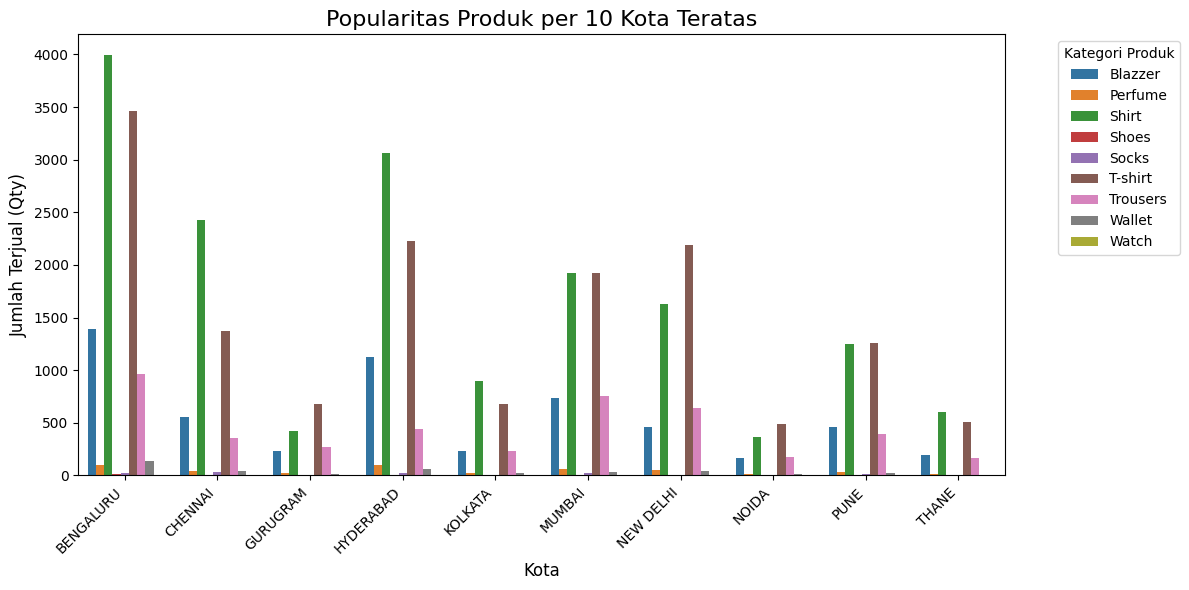

In [ ]:
# ===================== Popularitas Produk per Wilayah =====================

# 1. Agregasi data untuk mendapatkan total penjualan (Qty) per kota
city_sales = data_amazon.groupby('ship-city')['Qty'].sum().reset_index()

# 2. Ambil 10 kota teratas berdasarkan total penjualan
top_cities = city_sales.nlargest(10, 'Qty')['ship-city']
product_region_filtered = data_amazon[data_amazon['ship-city'].isin(top_cities)]

# 3. Lakukan agregasi lagi untuk 10 kota teratas, per kategori
product_region_filtered = product_region_filtered.groupby(['ship-city', 'Category'])['Qty'].sum().reset_index()

# 4. Visualisasikan data
plt.figure(figsize=(12, 6))
sns.barplot(data=product_region_filtered, x='ship-city', y='Qty', hue='Category')

plt.title('Popularitas Produk per 10 Kota Teratas', fontsize=16)
plt.xlabel('Kota', fontsize=12)
plt.ylabel('Jumlah Terjual (Qty)', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.legend(title='Kategori Produk', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Interpretasi**:

Bengaluru dan Hyderabad adalah pasar terbesar dalam hal volume penjualan. Di Bengaluru, Shirt menjadi produk terlaris dengan penjualan lebih dari 4.000 unit, diikuti oleh T-shirt dengan hampir 3.500 unit. Pola serupa terlihat di Hyderabad.

Meskipun Shirt dan T-shirt mendominasi, ada perbedaan preferensi di beberapa kota. Di New Delhi, T-shirt adalah produk yang paling populer, sementara di Mumbai dan Pune, penjualan Shirt dan T-shirt memiliki jumlah yang lebih seimbang.

Penjualan untuk kategori lain seperti Wallet, Socks, dan Watch sangat rendah di seluruh kota, mengindikasikan bahwa perusahaan sangat bergantung pada dua produk utama (Shirt dan T-shirt).

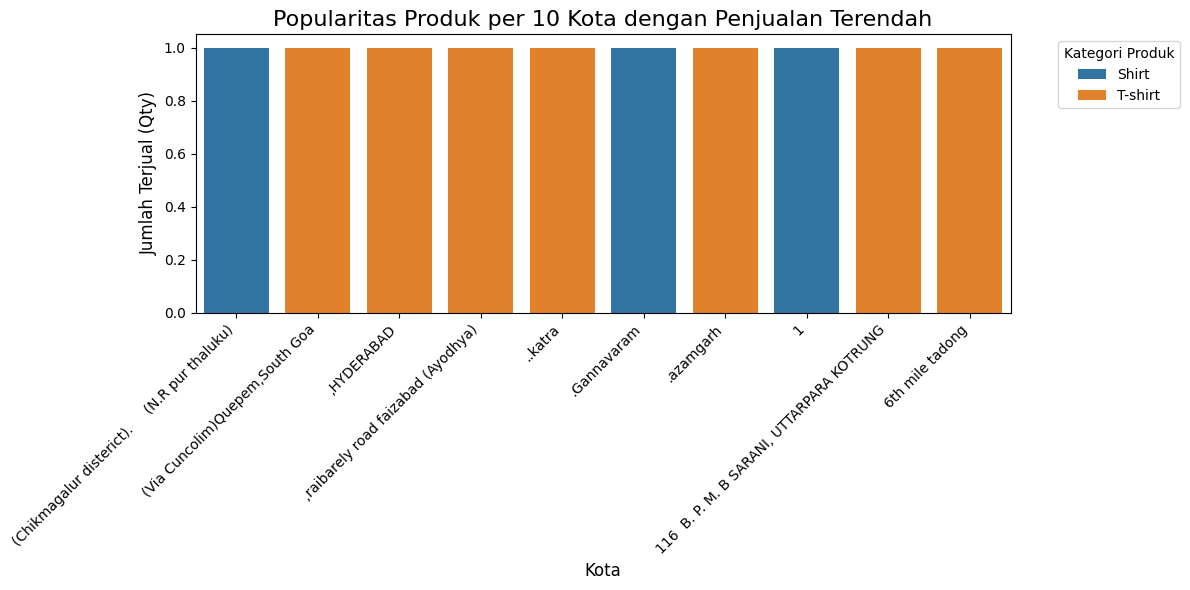

In [ ]:
# ===================== 2. Popularitas Produk per Wilayah =====================

# 1. Agregasi data untuk mendapatkan total penjualan (Qty) per kota
city_sales = data_amazon.groupby('ship-city')['Qty'].sum().reset_index()

# 2. Saring data untuk hanya mengambil kota dengan penjualan > 0,
# lalu ambil 10 kota dengan total penjualan terendah
bottom_cities = city_sales[city_sales['Qty'] > 0].nsmallest(10, 'Qty')['ship-city']
product_region_filtered = data_amazon[data_amazon['ship-city'].isin(bottom_cities)]

# 3. Lakukan agregasi lagi untuk 10 kota terbawah yang sudah difilter, per kategori
product_region_filtered = product_region_filtered.groupby(['ship-city', 'Category'])['Qty'].sum().reset_index()

# 4. Visualisasikan data
plt.figure(figsize=(12, 6))
sns.barplot(data=product_region_filtered, x='ship-city', y='Qty', hue='Category')

plt.title('Popularitas Produk per 10 Kota dengan Penjualan Terendah', fontsize=16)
plt.xlabel('Kota', fontsize=12)
plt.ylabel('Jumlah Terjual (Qty)', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.legend(title='Kategori Produk', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()